# Import the required libraries

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Import data, explore the table and perform some EDA

In [3]:
train = reduce_mem_usage(pd.read_csv(r"D:\Master Program\Racing team\Workshop AI sessions\Advanced Linear Regression\train.csv"))
test = reduce_mem_usage(pd.read_csv(r"D:\Master Program\Racing team\Workshop AI sessions\Advanced Linear Regression\test.csv"))
print(train.shape)
print(test.shape)
train.info()

Memory usage of dataframe is 0.90 MB --> 0.58 MB (Decreased by 35.5%)
Memory usage of dataframe is 0.89 MB --> 0.60 MB (Decreased by 32.3%)
(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int16  
 1   MSSubClass     1460 non-null   int16  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float32
 4   LotArea        1460 non-null   int32  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 no

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int16  
 1   MSSubClass     1459 non-null   int16  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float32
 4   LotArea        1459 non-null   int32  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int8   
 18  OverallC

In [5]:
cat_cols = [col for col in train.columns if train[col].dtype == 'O' ]
nu_int8 = [col for col in train.columns if train[col].dtype == 'int8' ]
nu_int16 = [col for col in train.columns if train[col].dtype == 'int16' ]
nu_int32 = [col for col in train.columns if train[col].dtype == 'int32' ]
nu_float32 = [col for col in train.columns if train[col].dtype == 'float32' ]

In [6]:
print(len(cat_cols))
print(len(nu_int8))
print(len(nu_int16))
print(len(nu_int32))
print(len(nu_float32))

43
12
21
2
3


                MSZoning


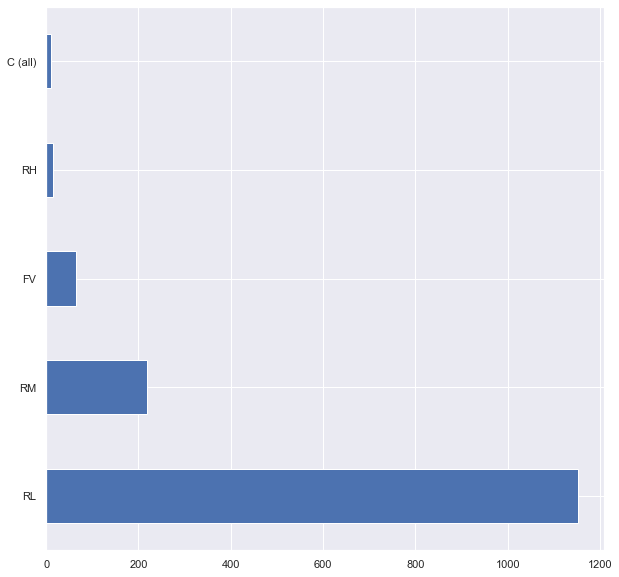

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Street


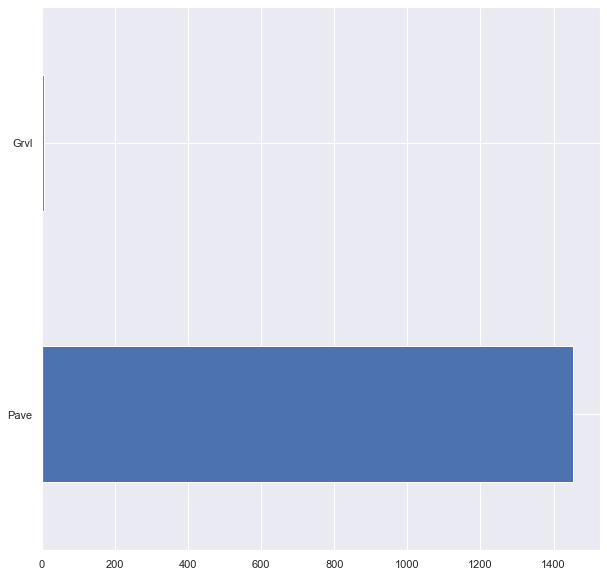

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Alley


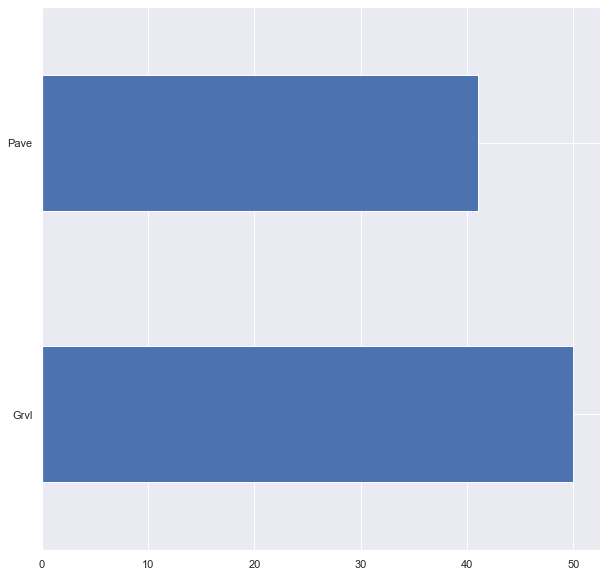

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LotShape


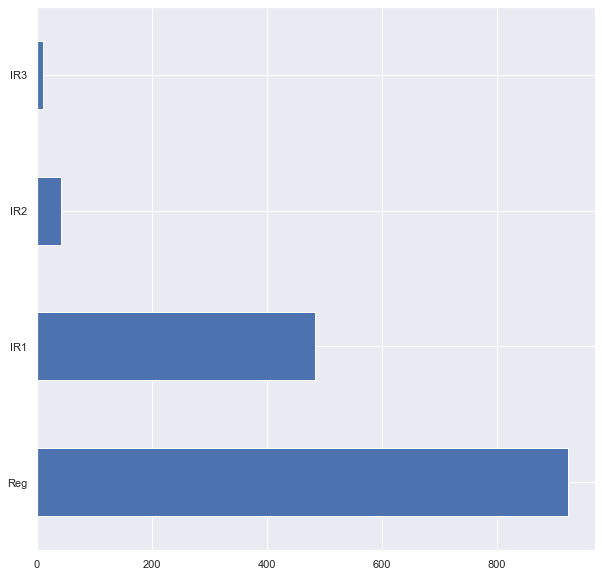

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LandContour


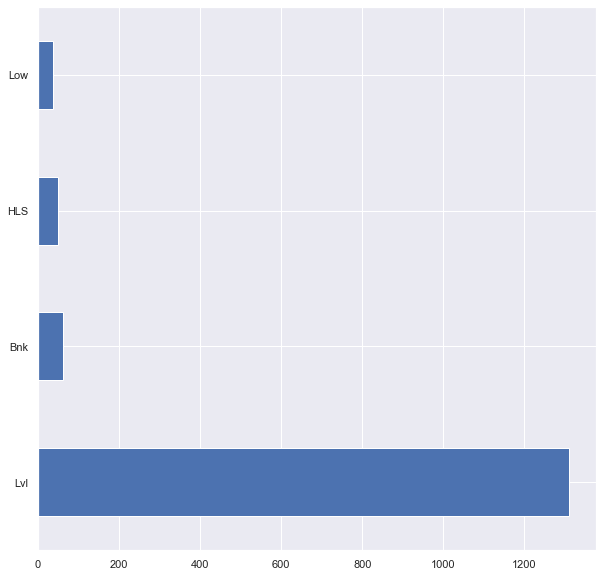

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Utilities


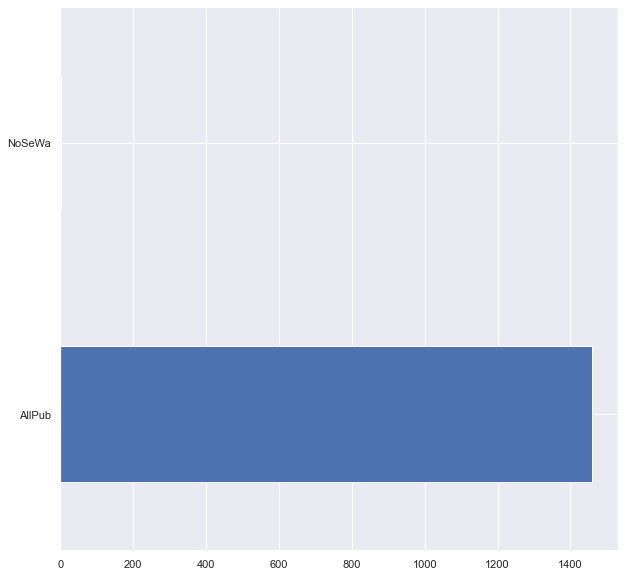

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LotConfig


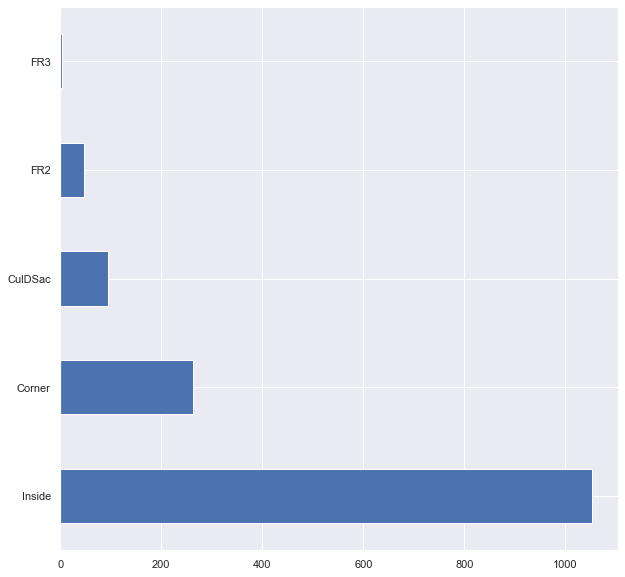

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LandSlope


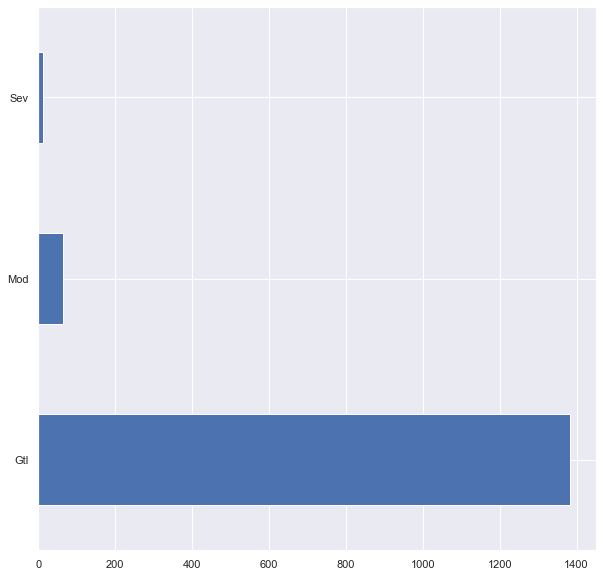

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Neighborhood


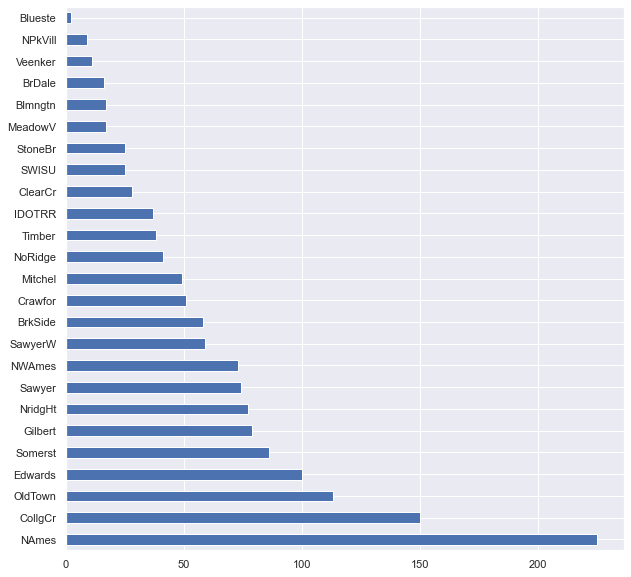

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Condition1


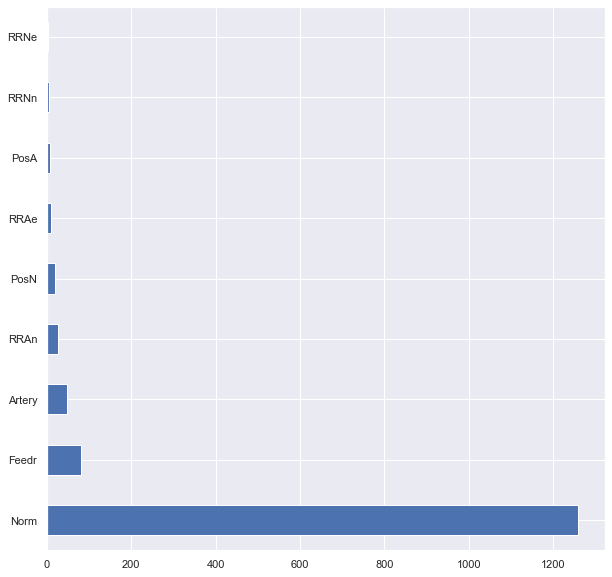

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Condition2


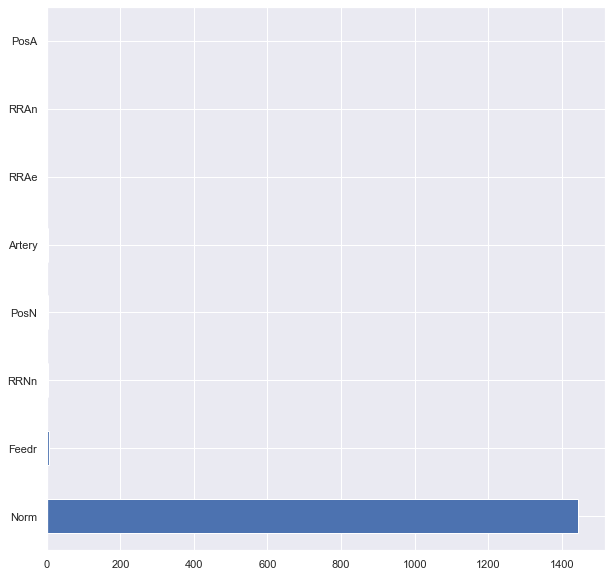

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BldgType


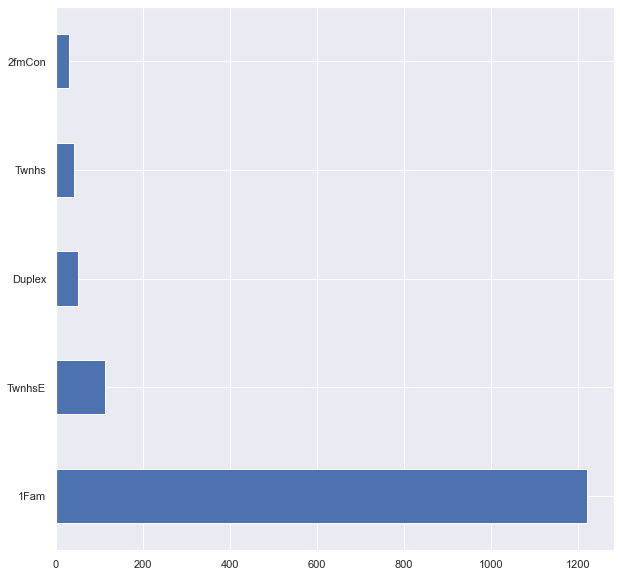

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                HouseStyle


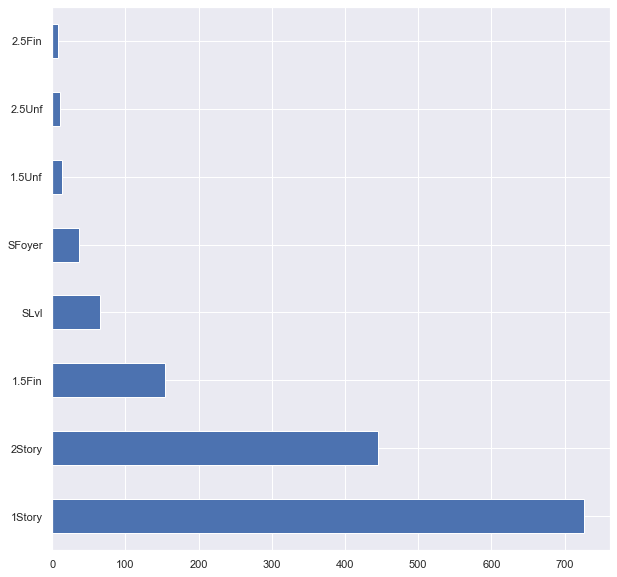

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                RoofStyle


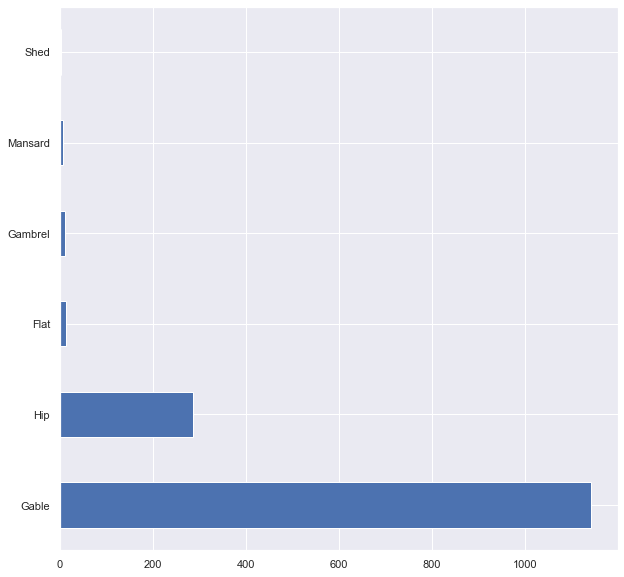

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                RoofMatl


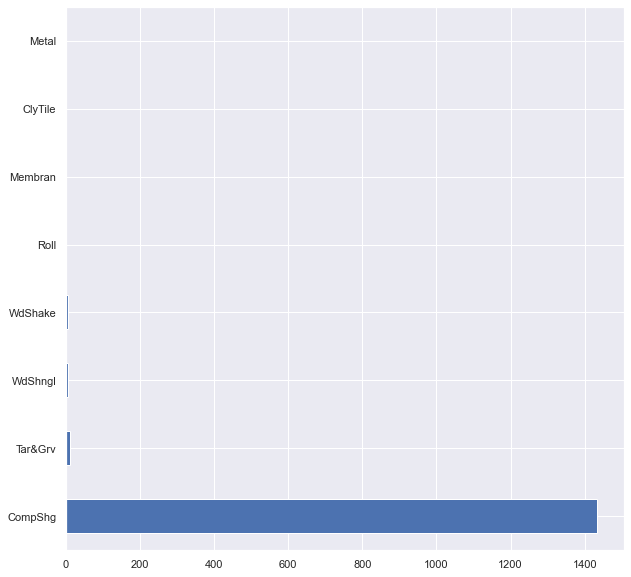

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Exterior1st


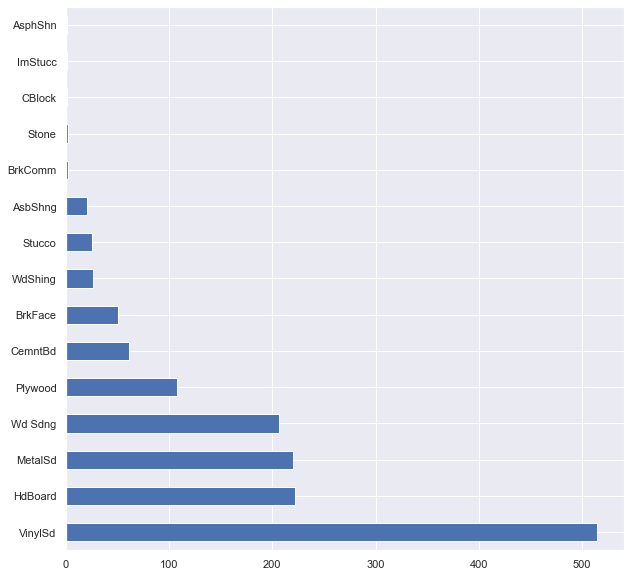

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Exterior2nd


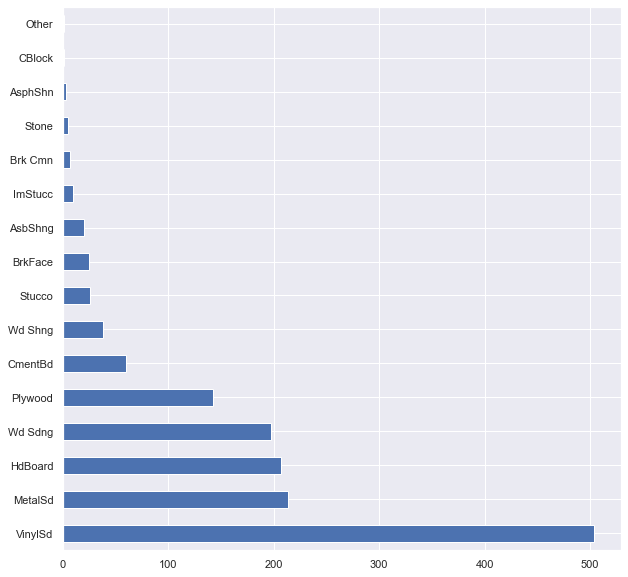

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MasVnrType


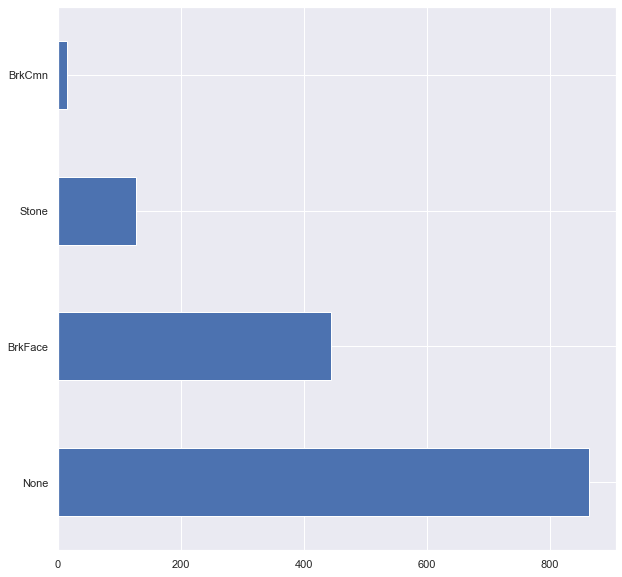

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                ExterQual


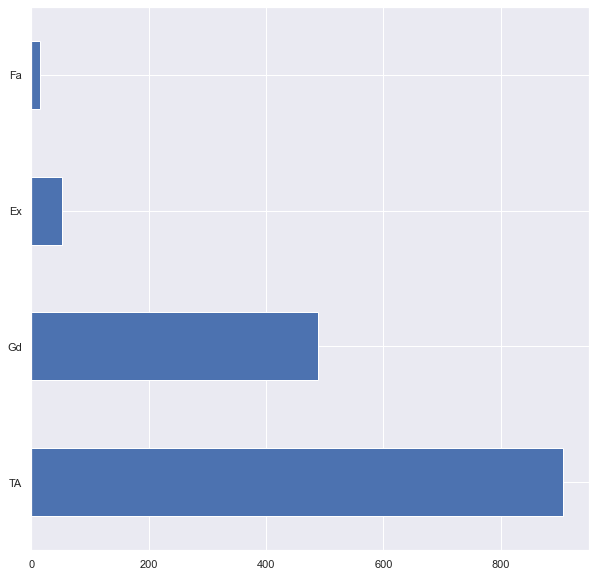

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                ExterCond


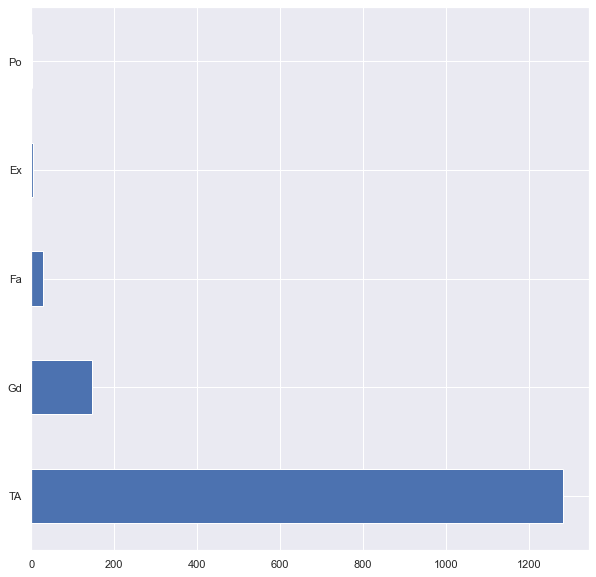

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Foundation


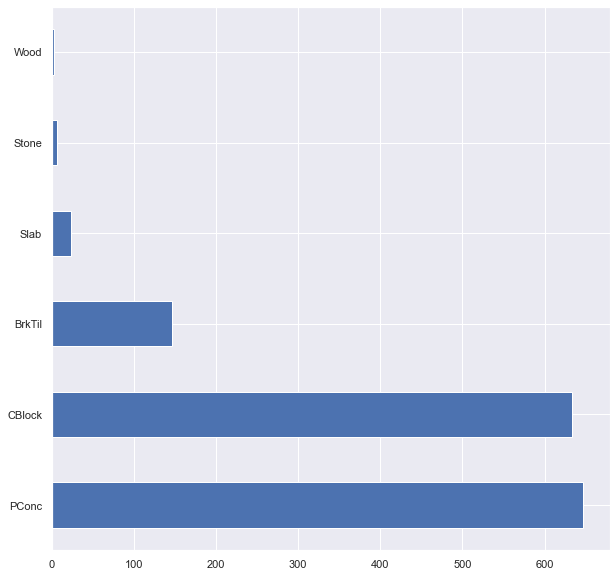

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtQual


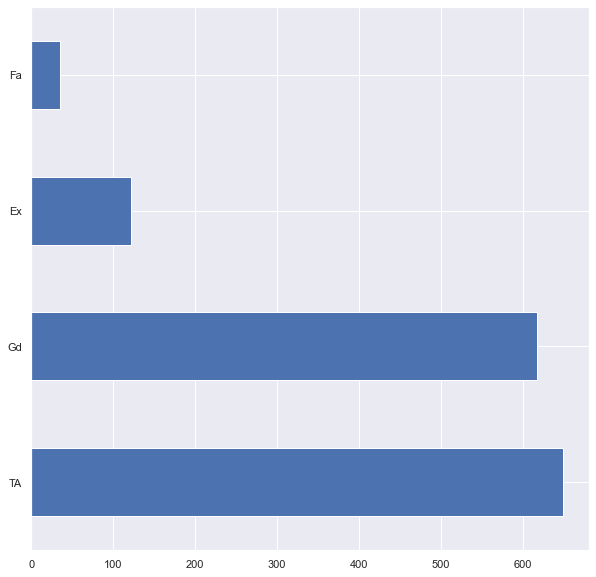

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtCond


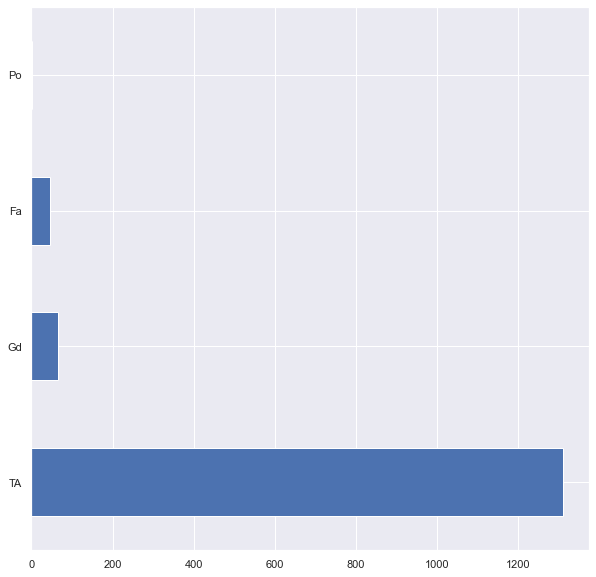

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtExposure


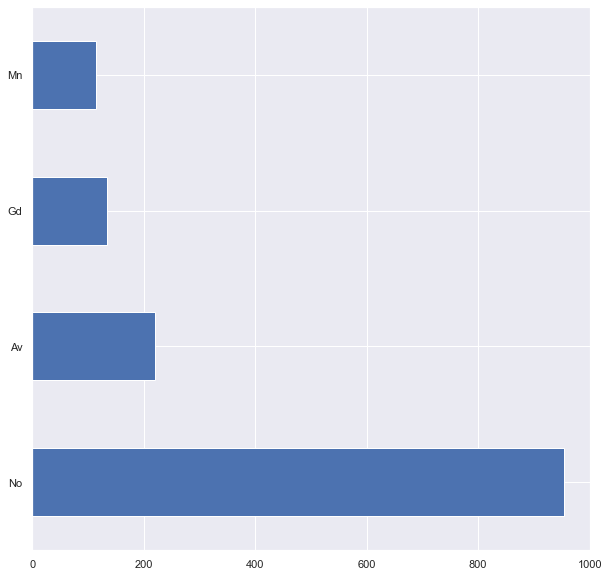

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinType1


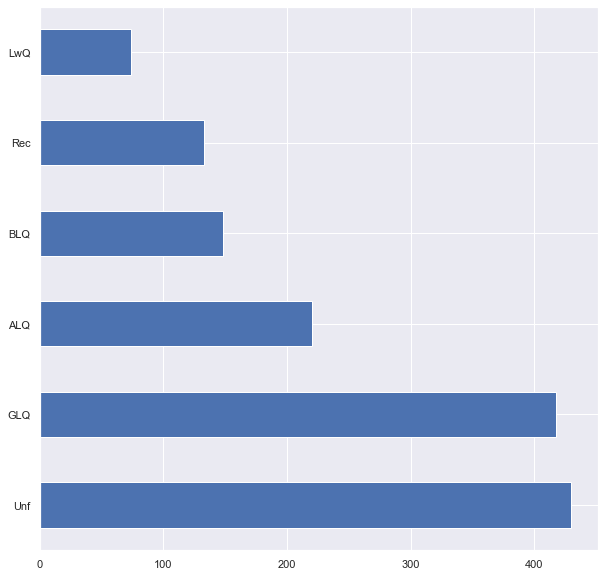

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinType2


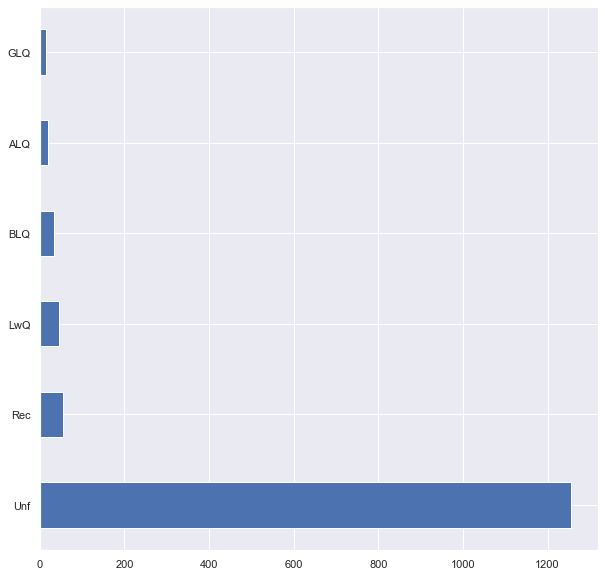

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Heating


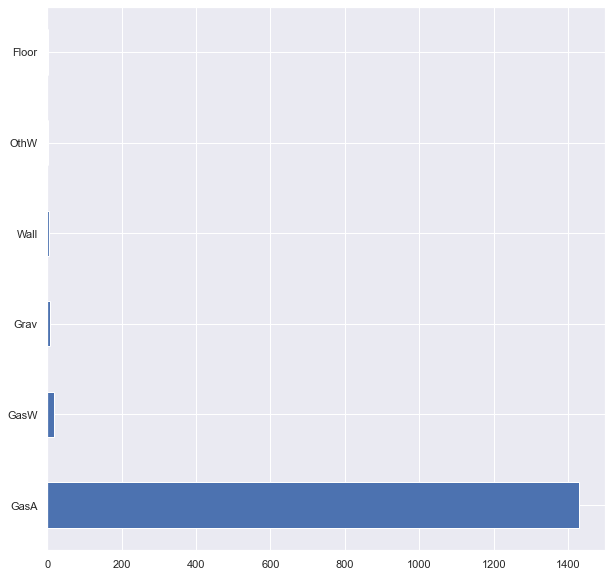

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                HeatingQC


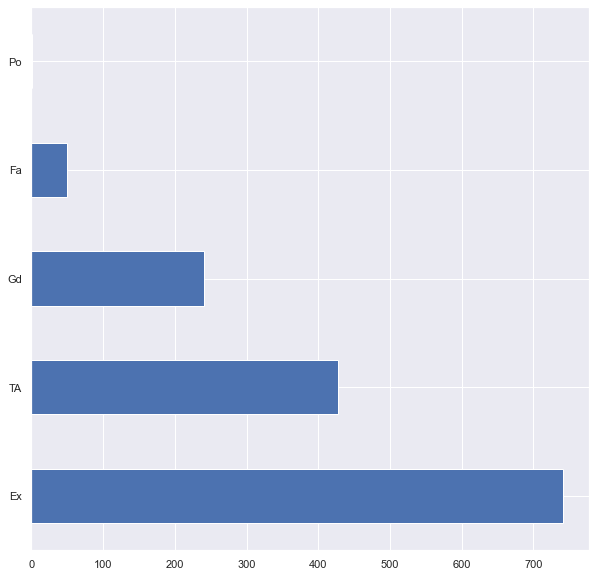

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                CentralAir


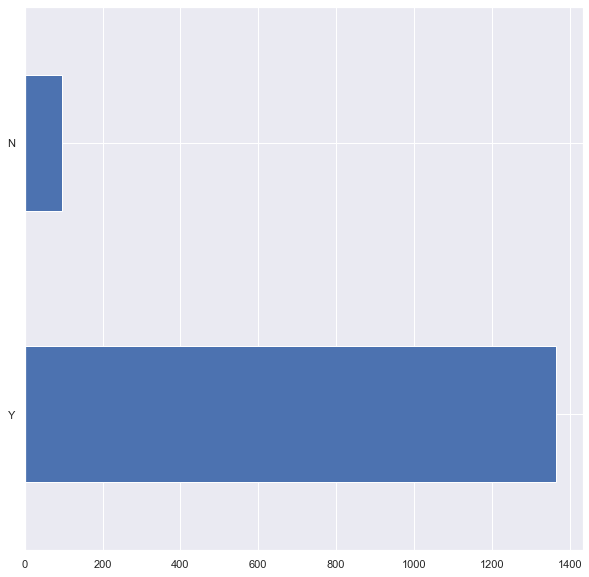

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Electrical


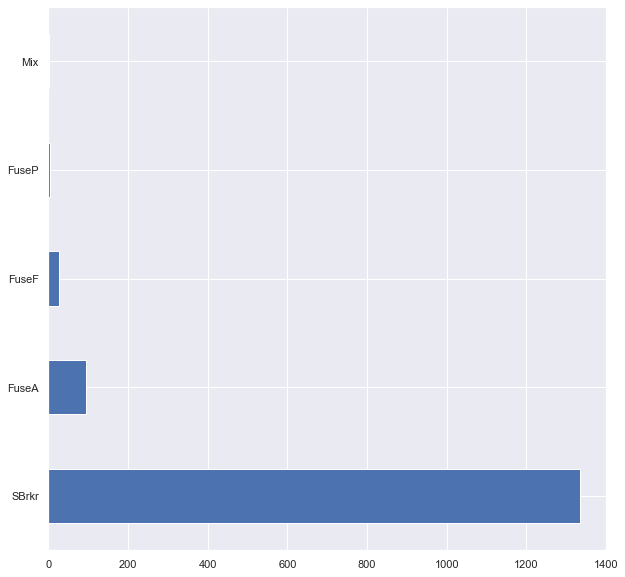

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                KitchenQual


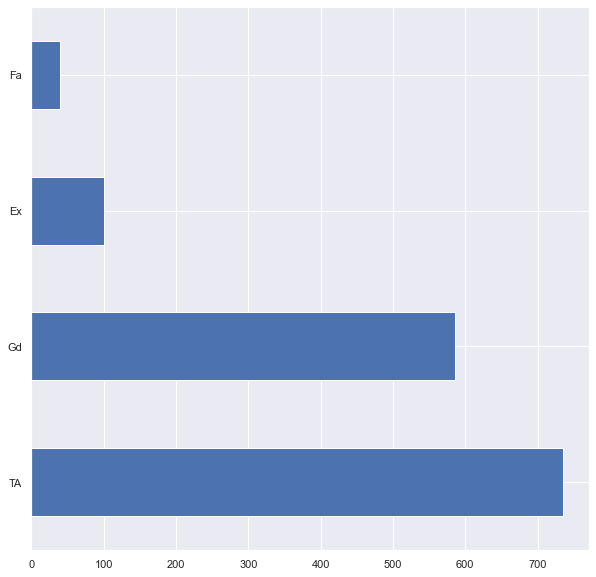

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Functional


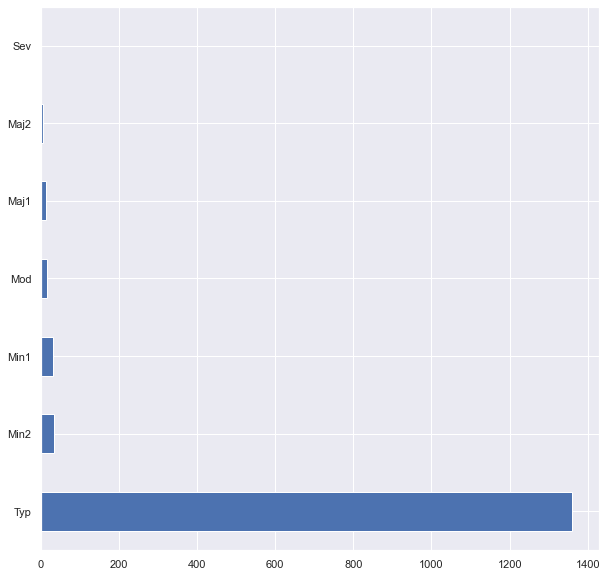

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                FireplaceQu


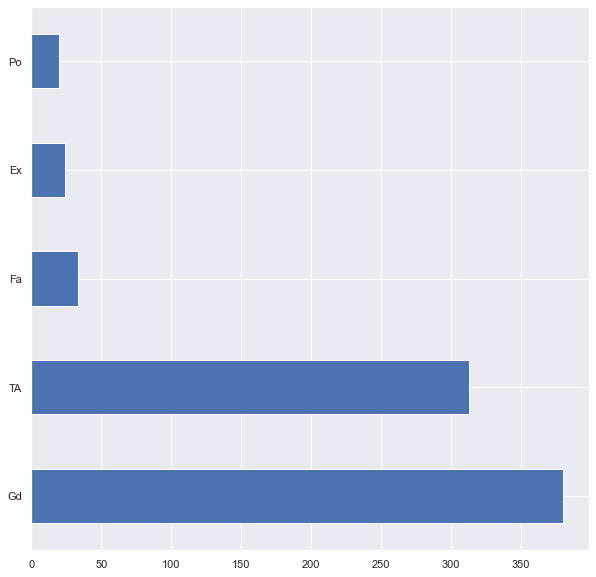

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageType


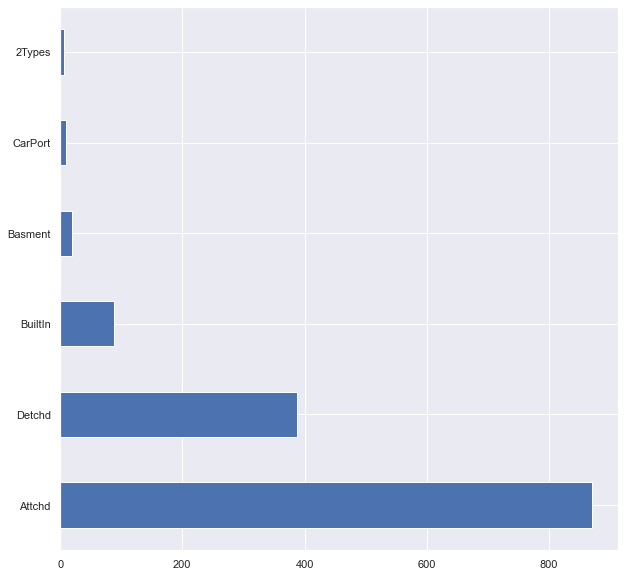

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageFinish


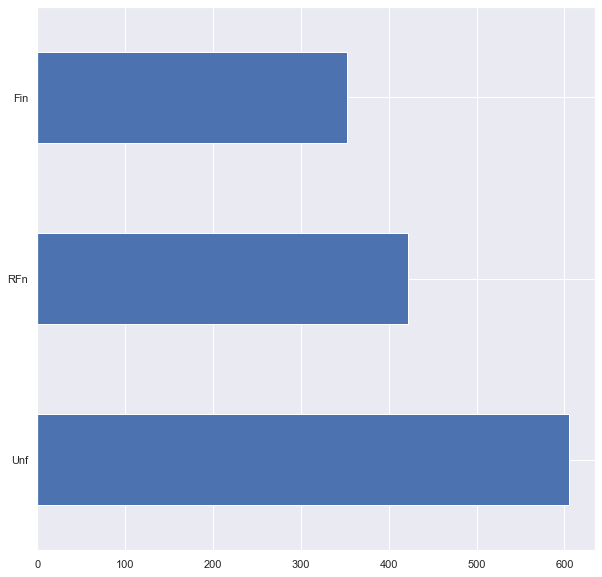

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageQual


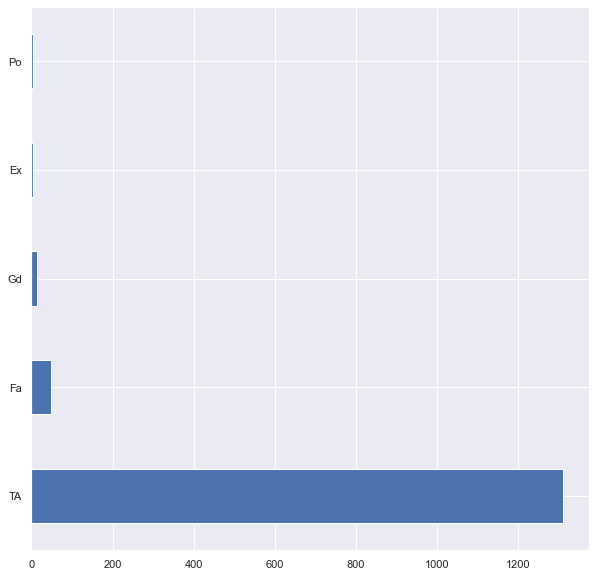

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageCond


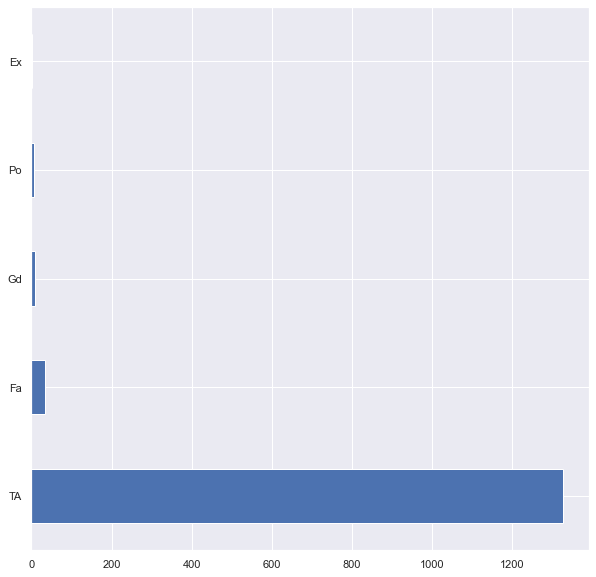

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                PavedDrive


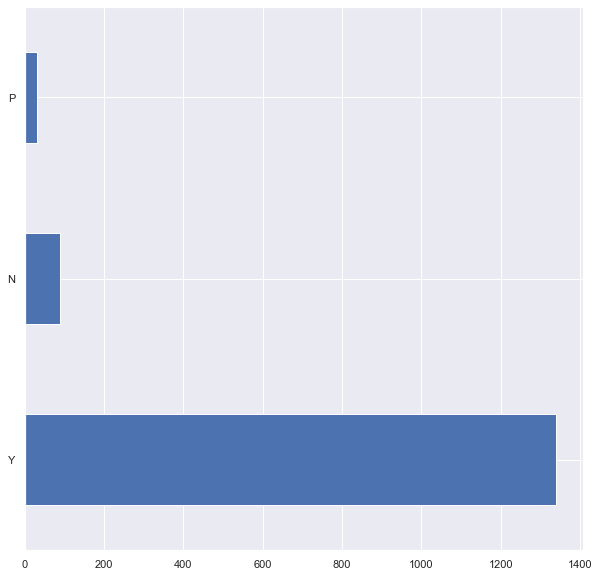

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                PoolQC


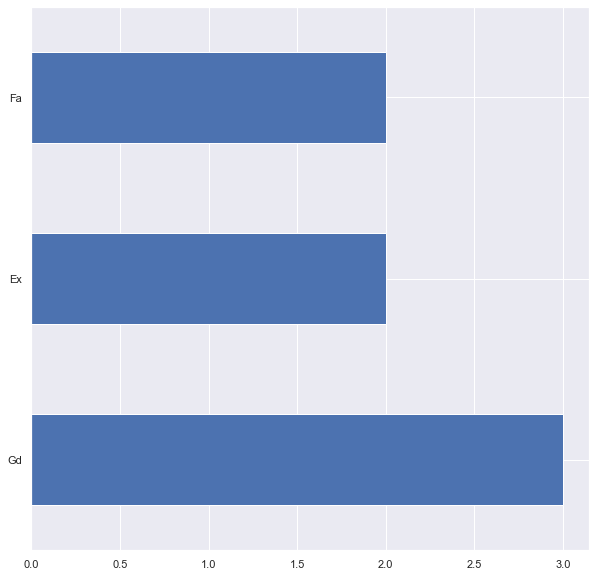

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Fence


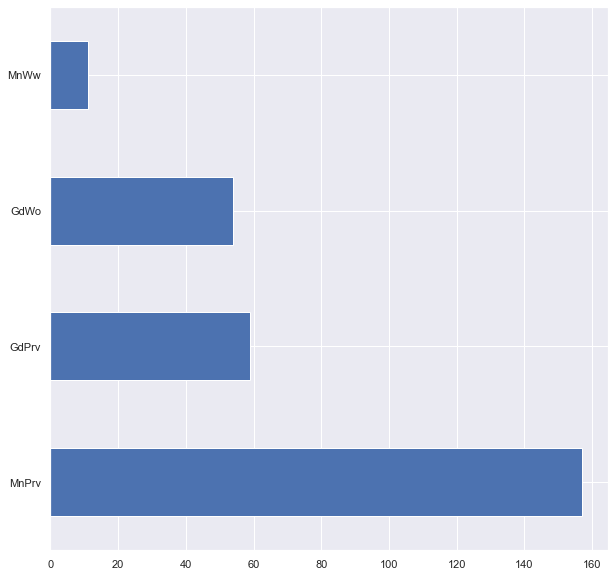

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MiscFeature


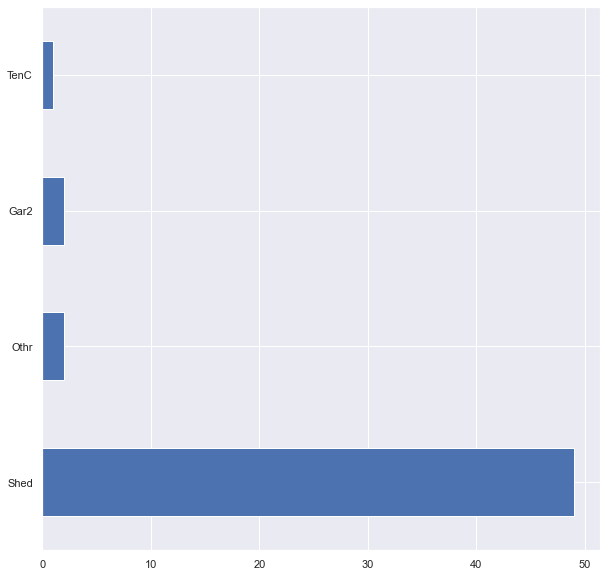

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                SaleType


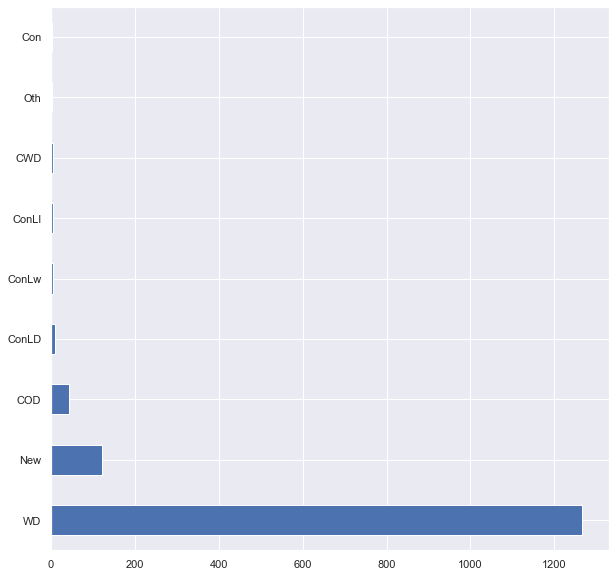

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                SaleCondition


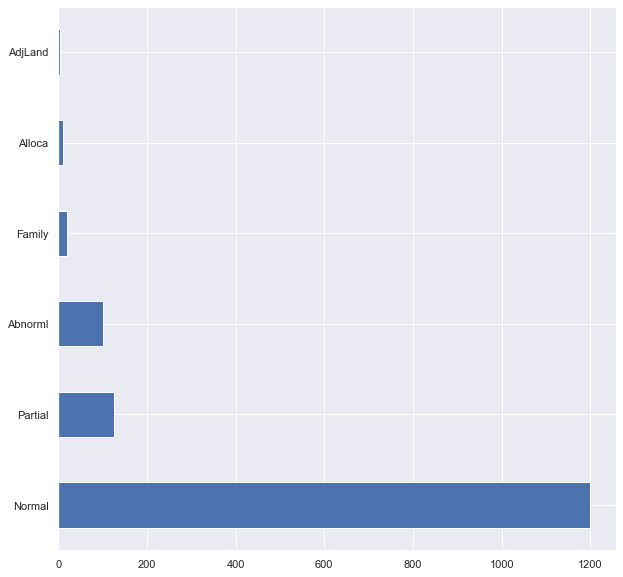

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [7]:
for col in cat_cols:
    print("               ",col)
    plt.figure(figsize=(10,10))
    train[col].value_counts().plot(kind = 'barh')
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

                MSZoning


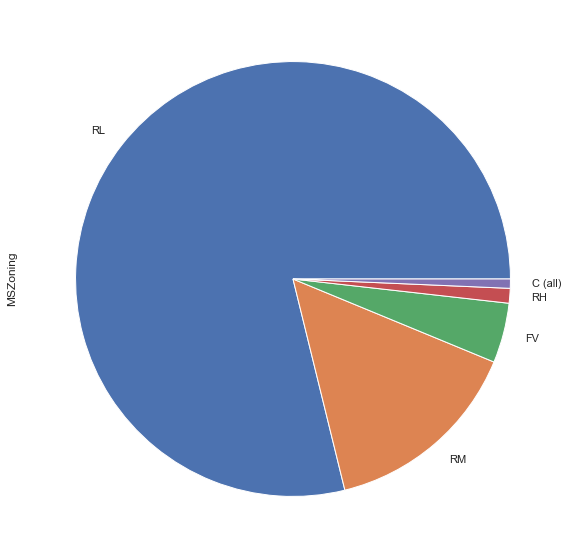

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Street


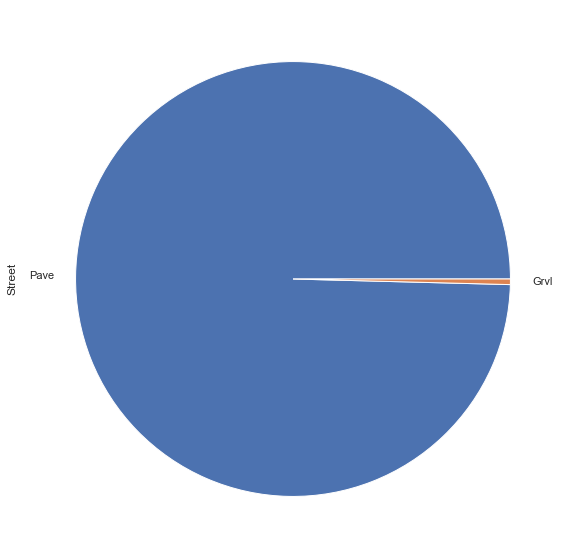

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Alley


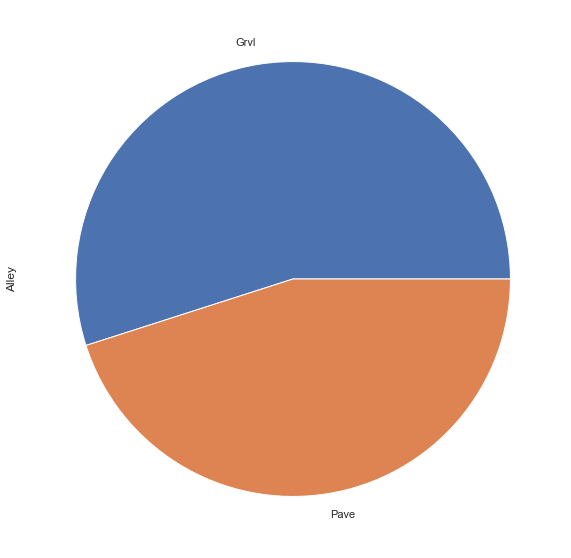

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LotShape


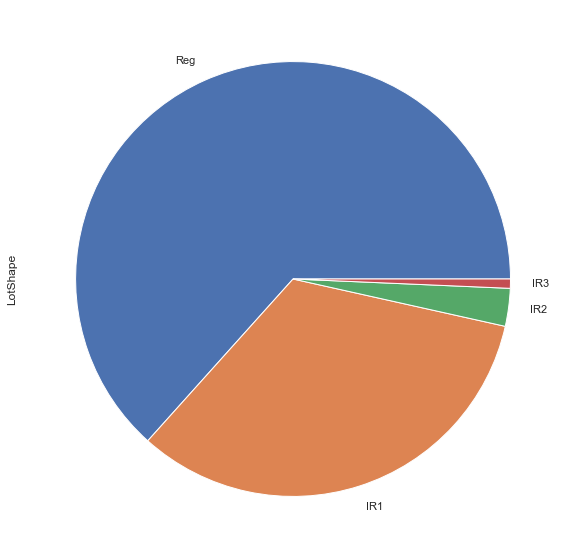

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LandContour


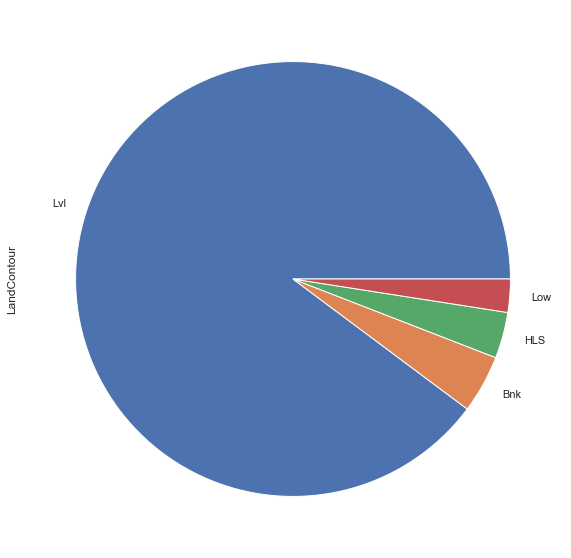

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Utilities


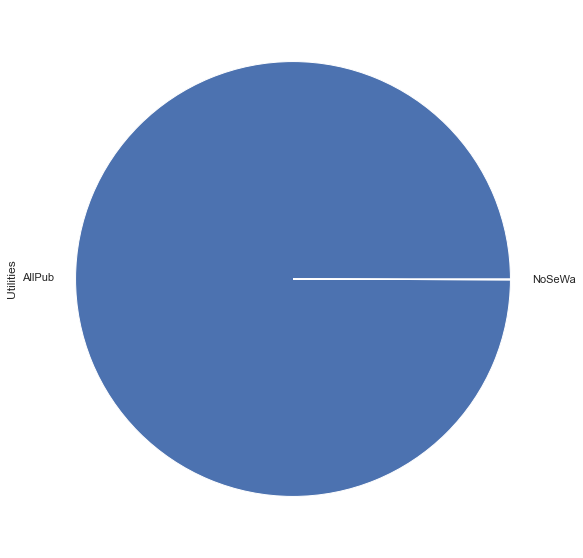

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LotConfig


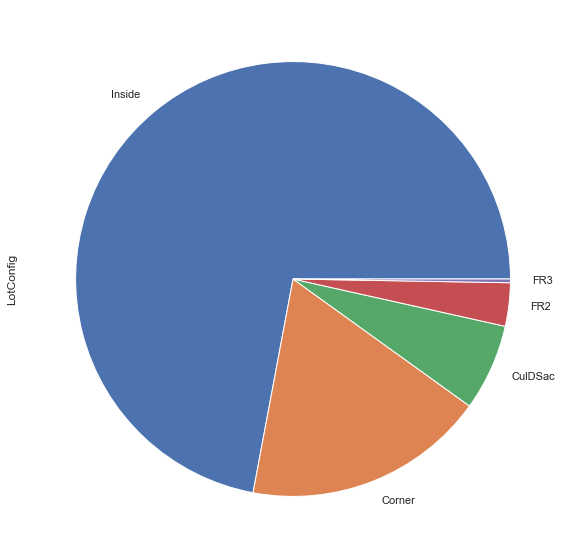

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LandSlope


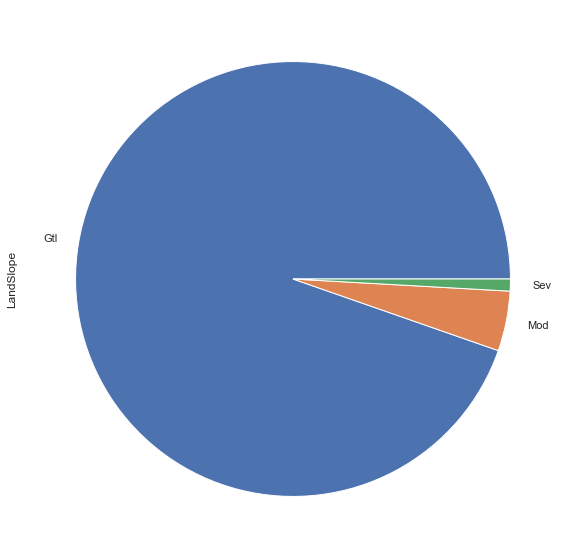

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Neighborhood


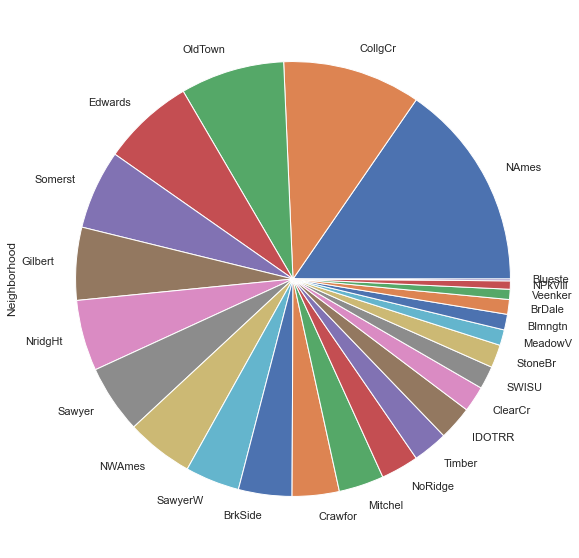

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Condition1


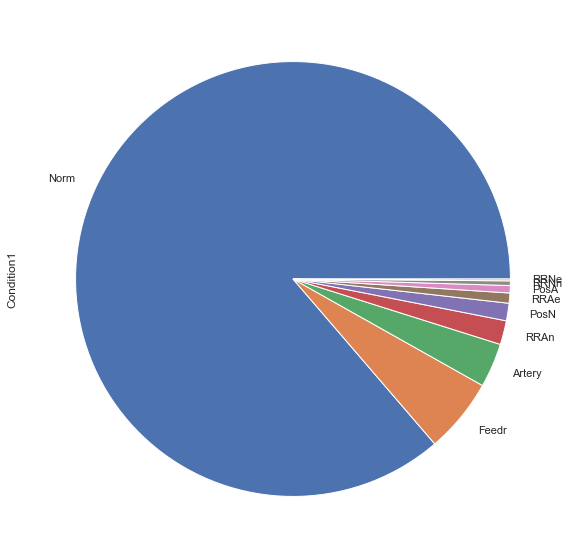

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Condition2


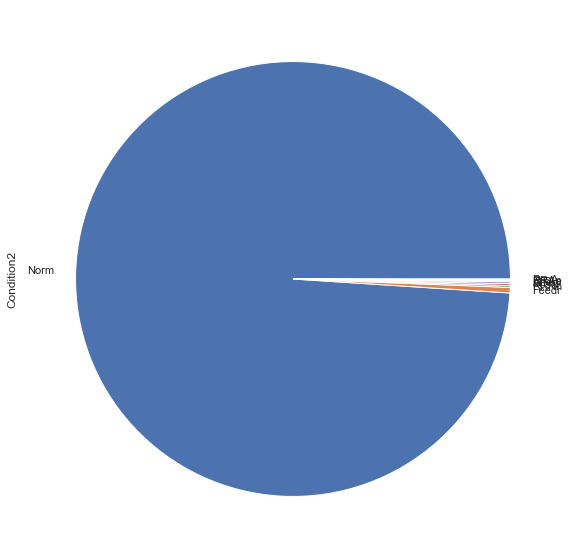

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BldgType


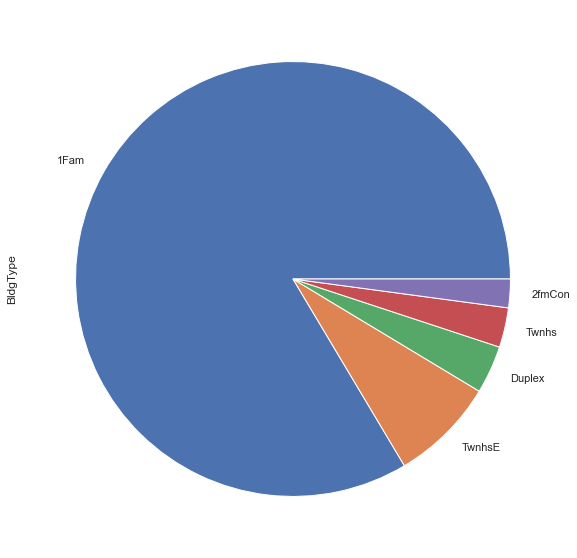

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                HouseStyle


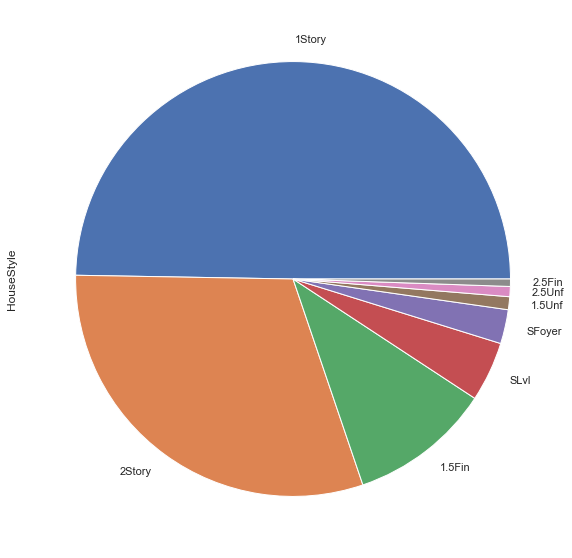

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                RoofStyle


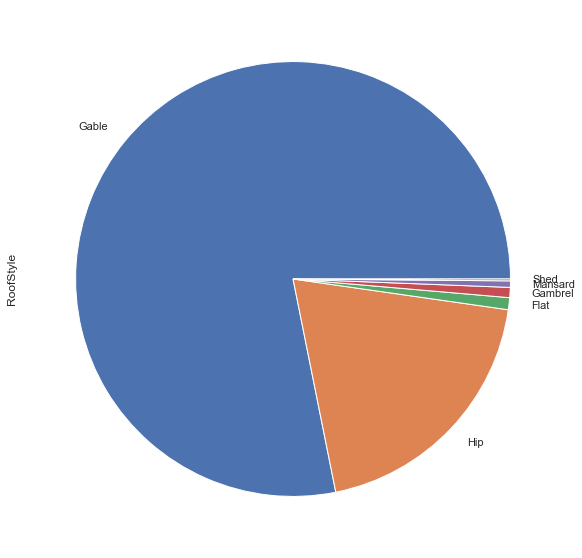

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                RoofMatl


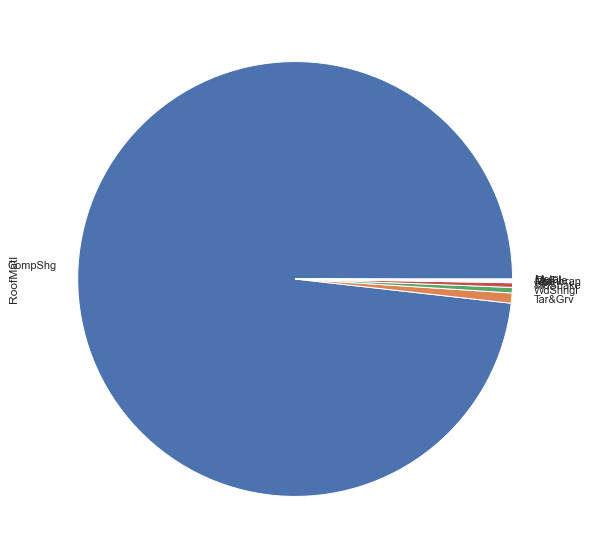

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Exterior1st


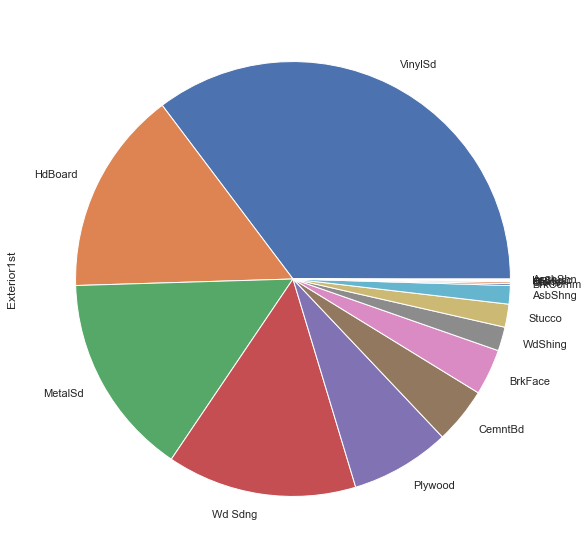

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Exterior2nd


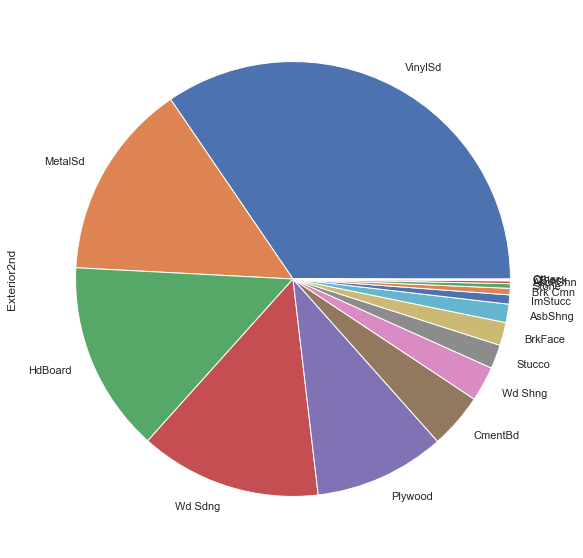

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MasVnrType


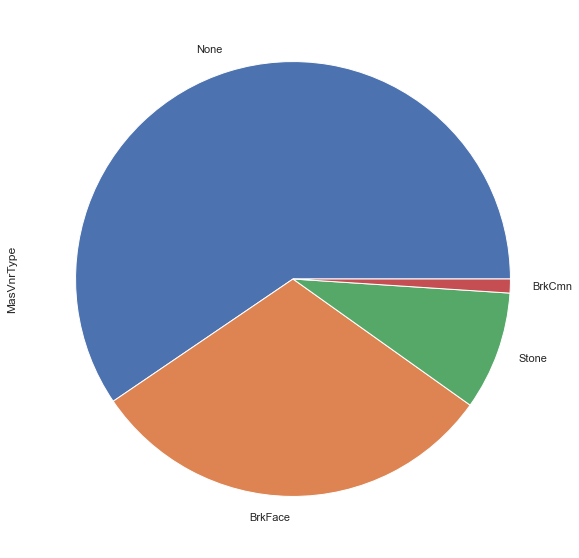

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                ExterQual


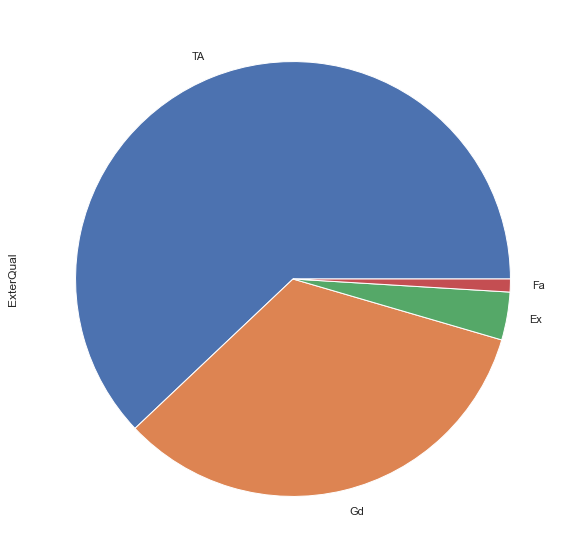

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                ExterCond


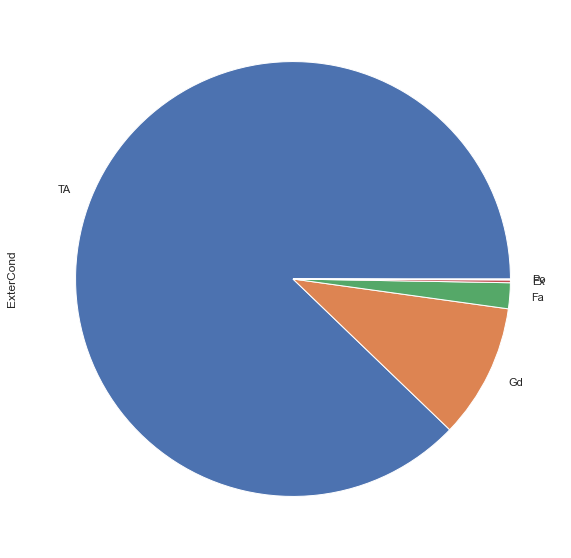

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Foundation


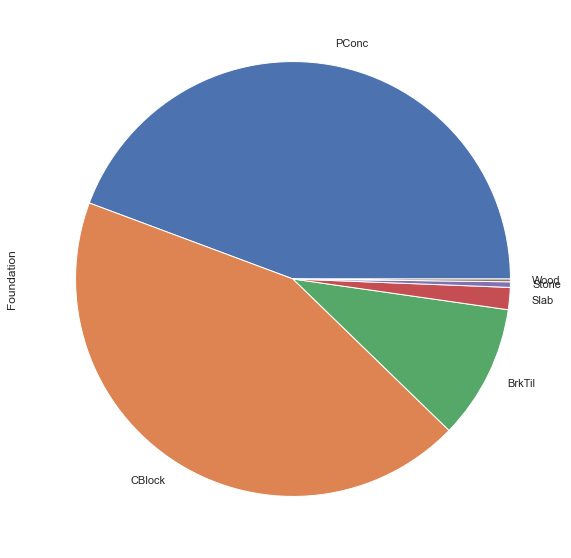

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtQual


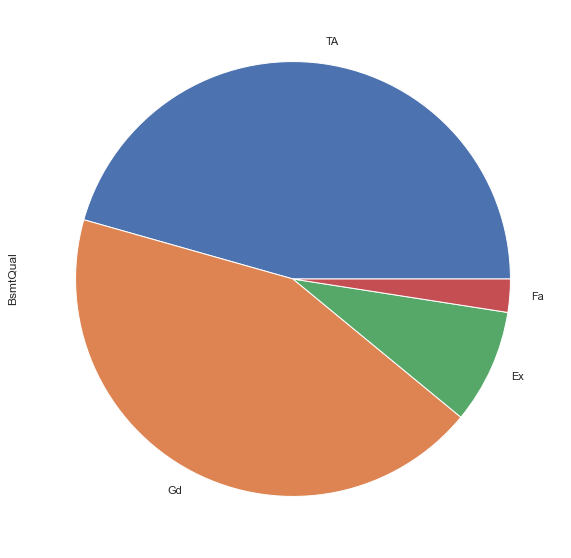

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtCond


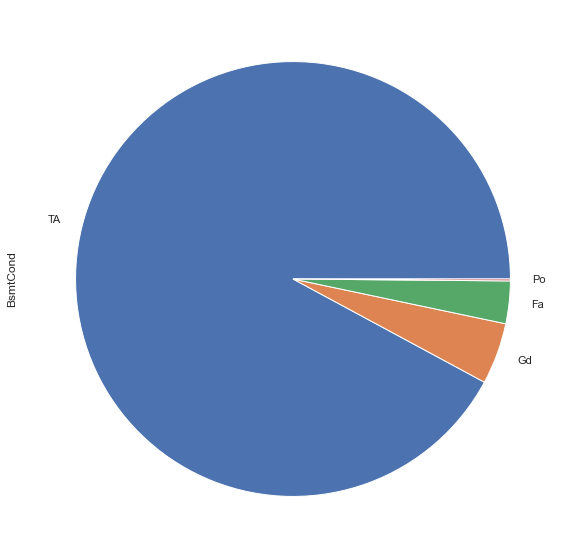

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtExposure


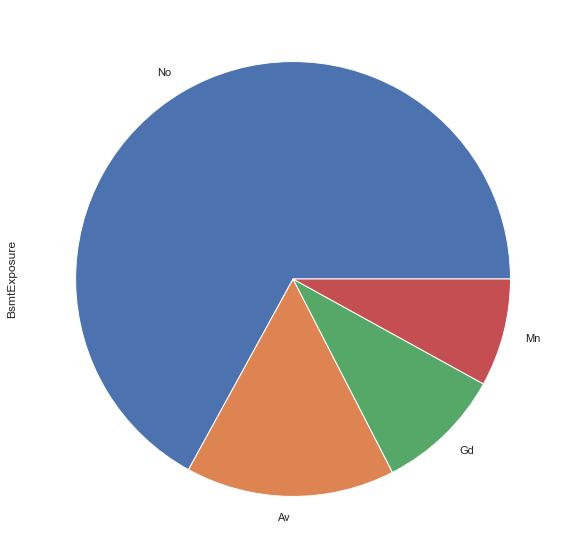

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinType1


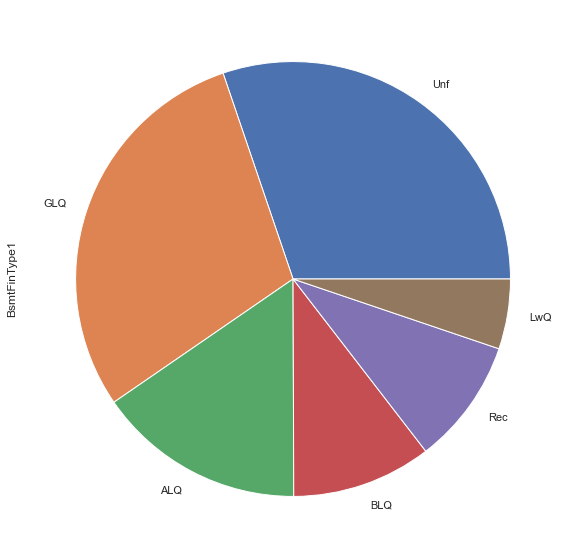

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinType2


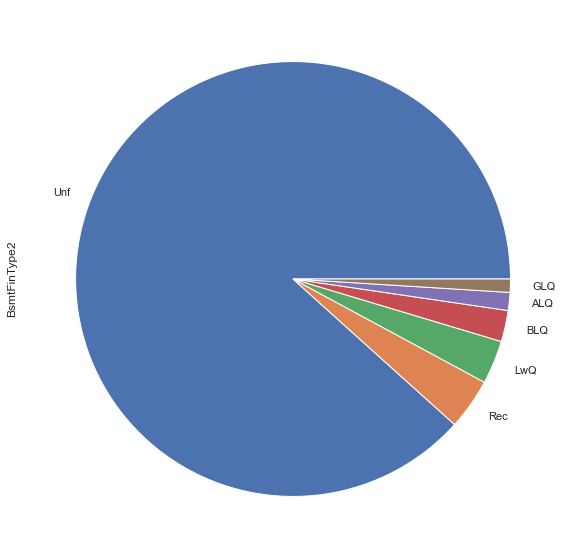

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Heating


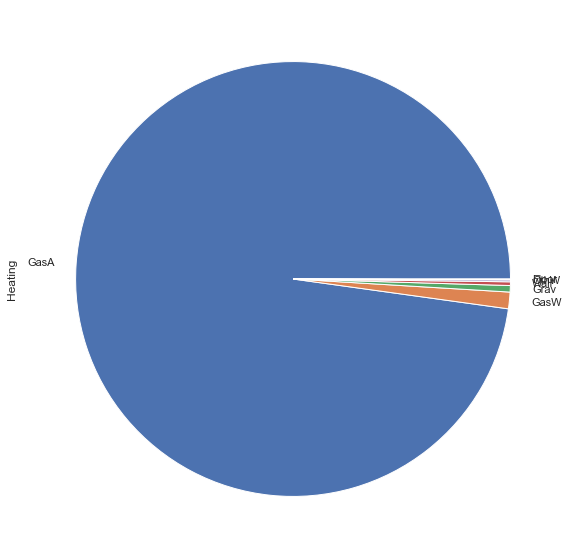

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                HeatingQC


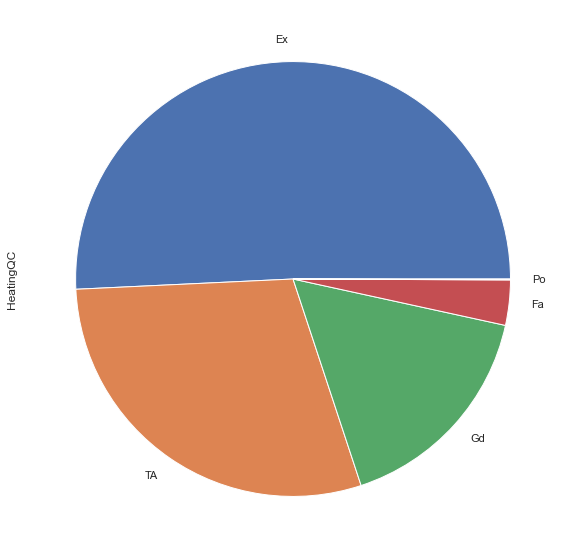

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                CentralAir


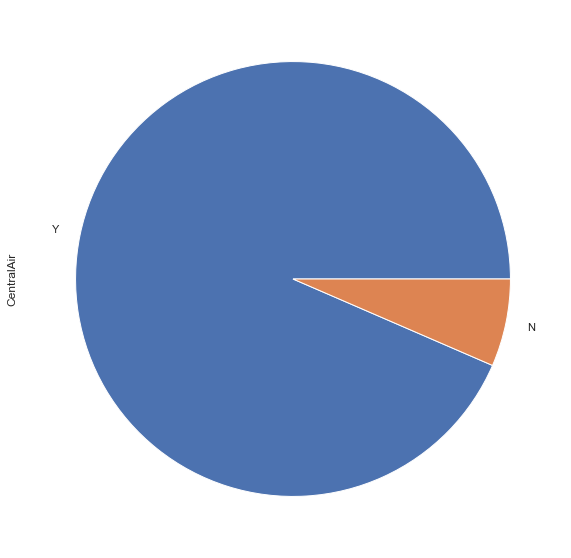

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Electrical


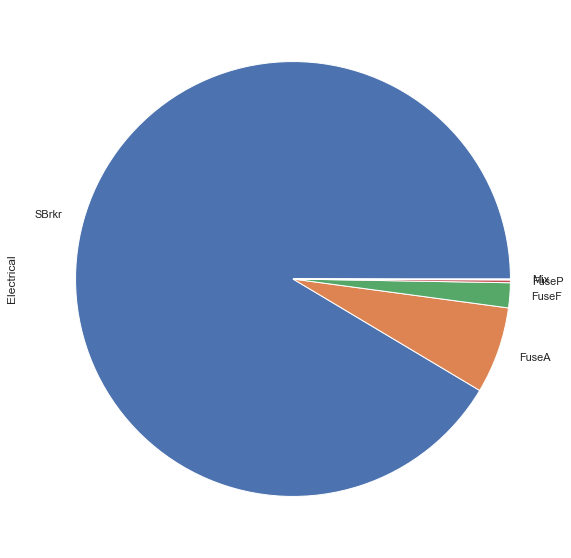

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                KitchenQual


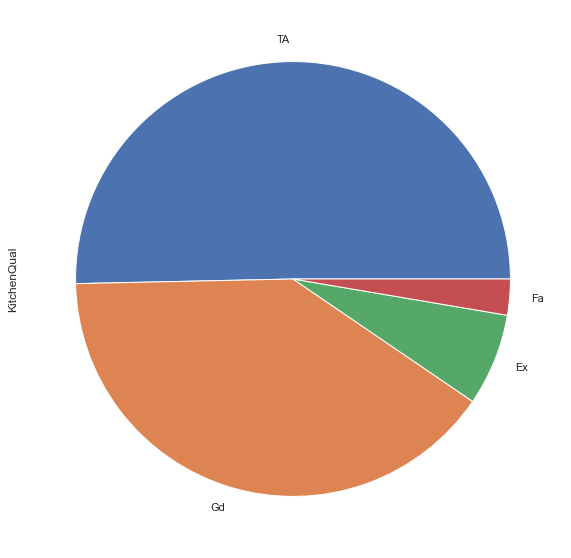

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Functional


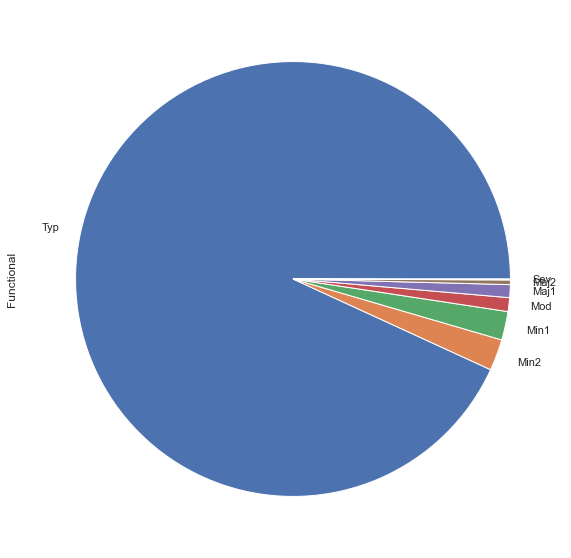

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                FireplaceQu


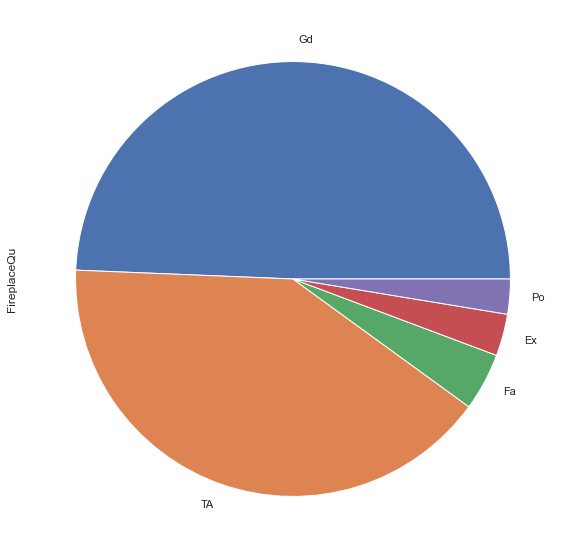

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageType


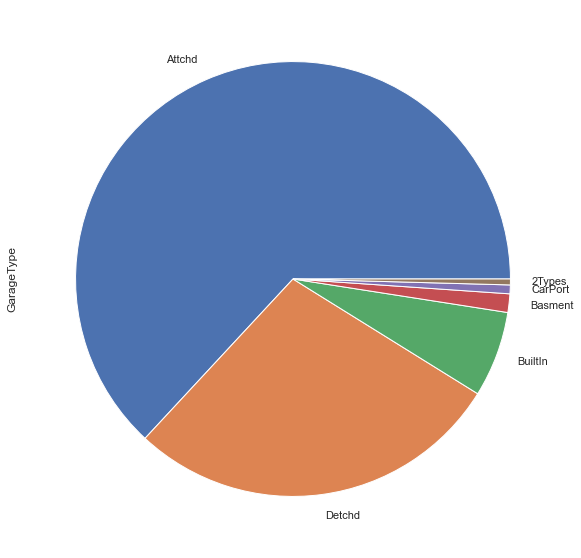

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageFinish


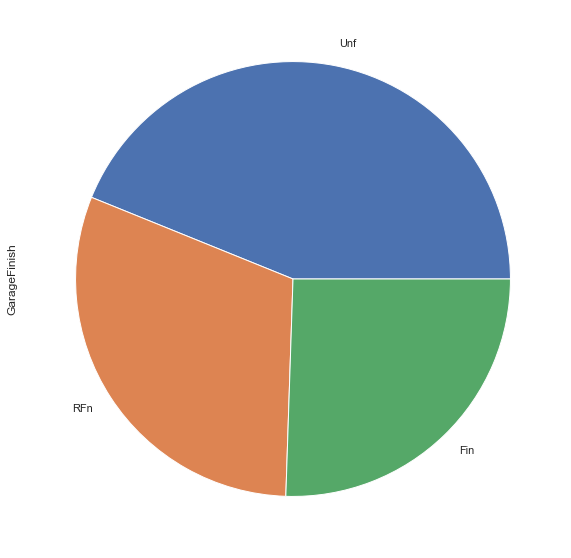

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageQual


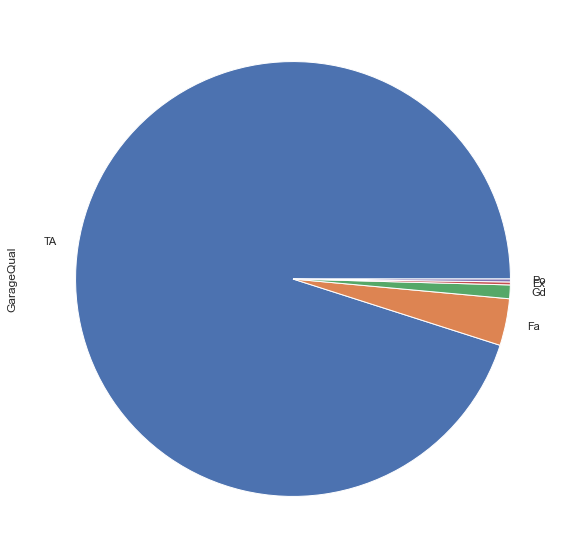

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageCond


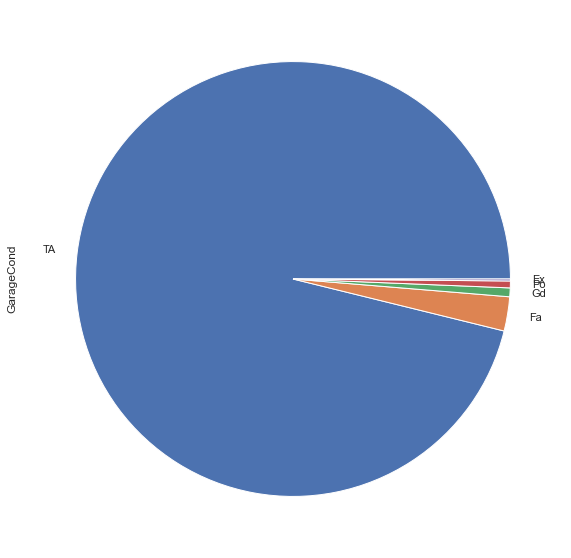

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                PavedDrive


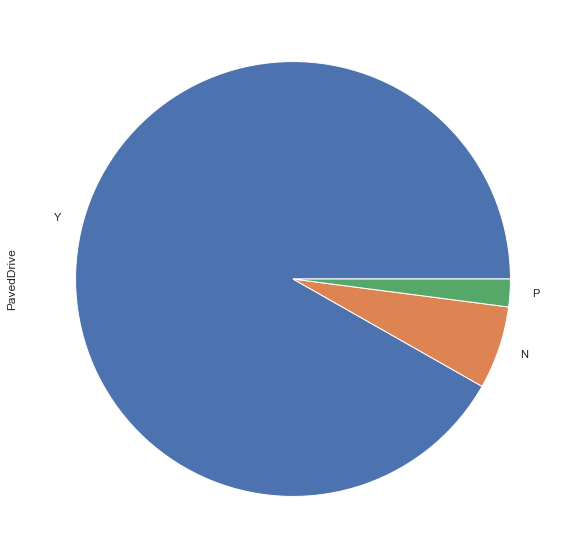

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                PoolQC


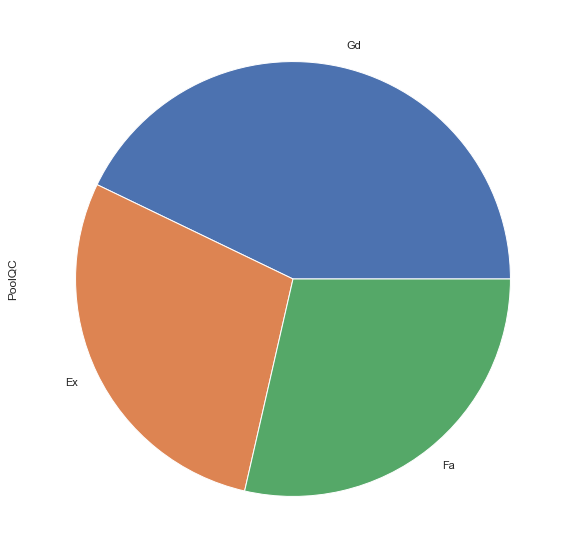

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Fence


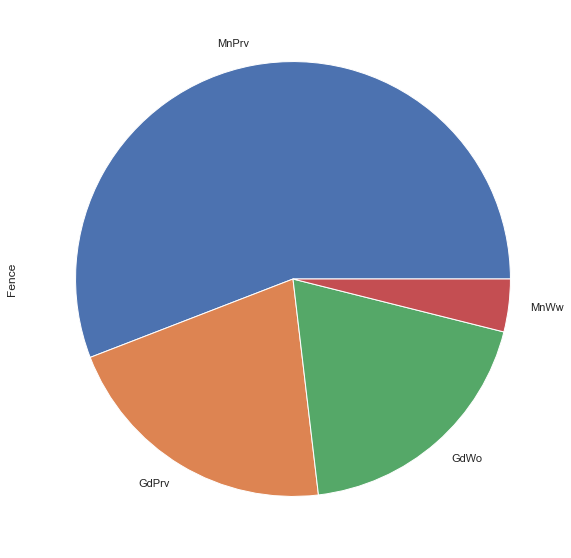

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MiscFeature


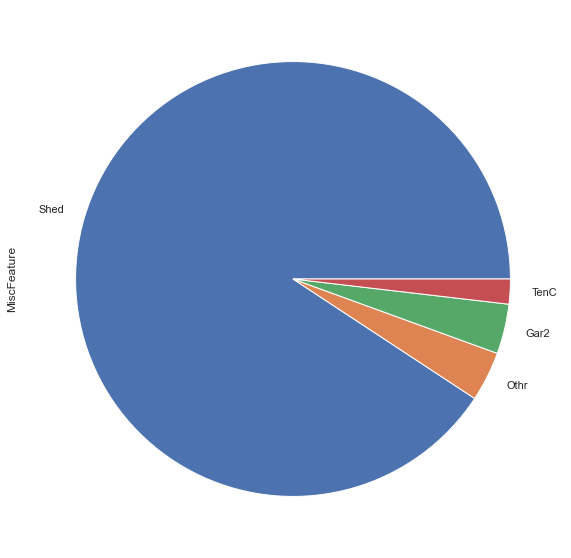

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                SaleType


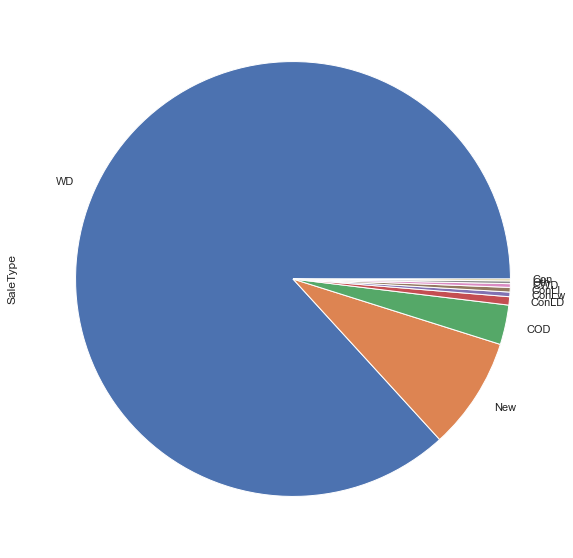

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                SaleCondition


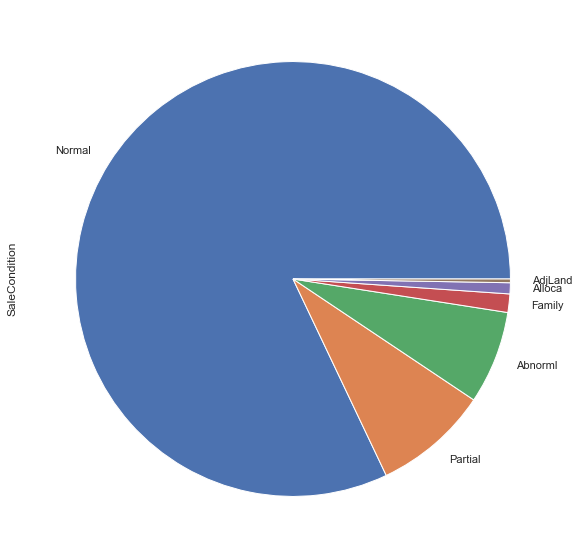

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [8]:
for col in cat_cols:
    print("               ",col)
    plt.figure(figsize=(10,10))
    train[col].value_counts().plot.pie()
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

                LotFrontage


<Figure size 720x720 with 0 Axes>

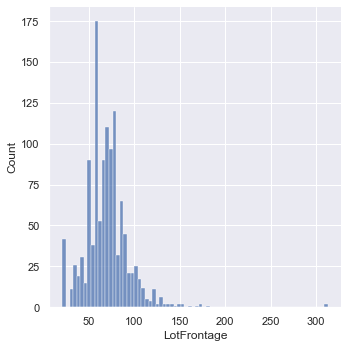

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MasVnrArea


<Figure size 720x720 with 0 Axes>

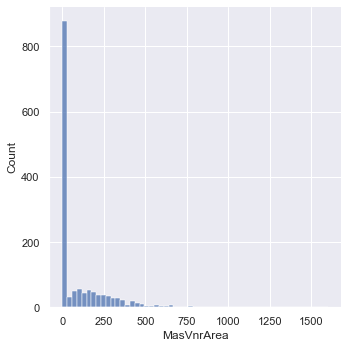

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageYrBlt


<Figure size 720x720 with 0 Axes>

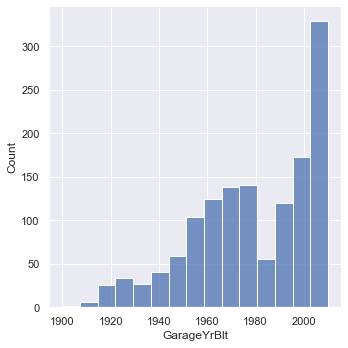

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [9]:
for col in nu_float32:
    print("               ",col)
    plt.figure(figsize=(10,10))
    sns.displot(train[col])
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

                LotArea


<Figure size 720x720 with 0 Axes>

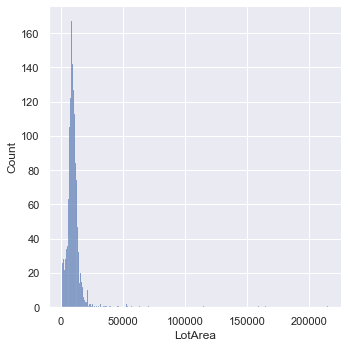

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                SalePrice


<Figure size 720x720 with 0 Axes>

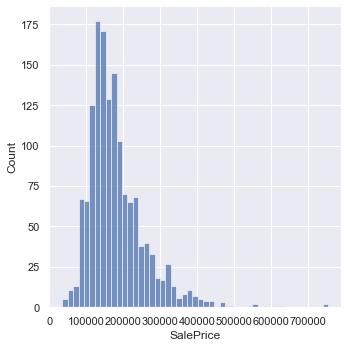

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [10]:
for col in nu_int32:
    print("               ",col)
    plt.figure(figsize=(10,10))
    sns.displot(train[col])
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

                Id


<Figure size 720x720 with 0 Axes>

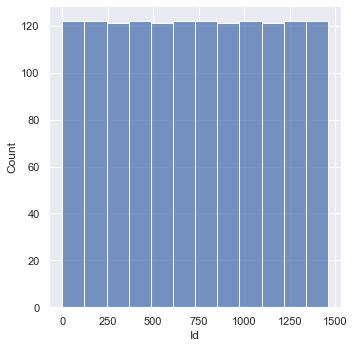

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MSSubClass


<Figure size 720x720 with 0 Axes>

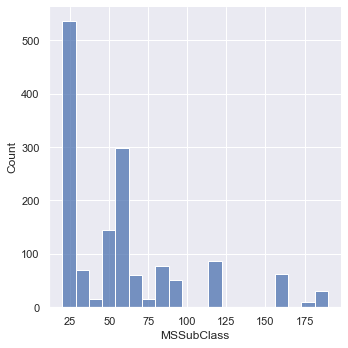

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                YearBuilt


<Figure size 720x720 with 0 Axes>

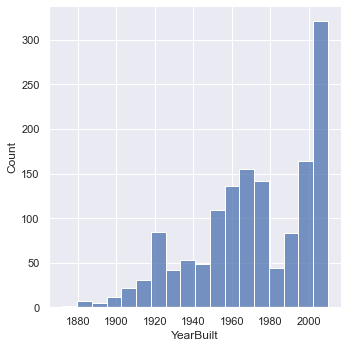

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                YearRemodAdd


<Figure size 720x720 with 0 Axes>

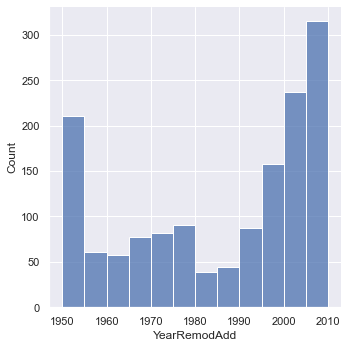

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinSF1


<Figure size 720x720 with 0 Axes>

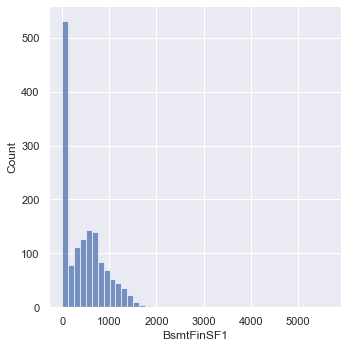

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinSF2


<Figure size 720x720 with 0 Axes>

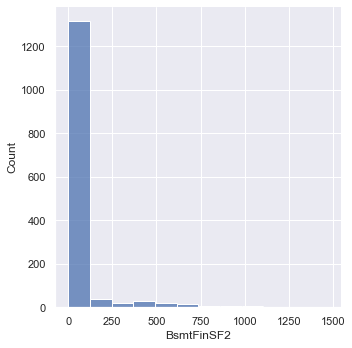

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtUnfSF


<Figure size 720x720 with 0 Axes>

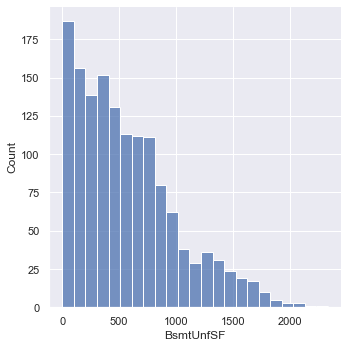

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                TotalBsmtSF


<Figure size 720x720 with 0 Axes>

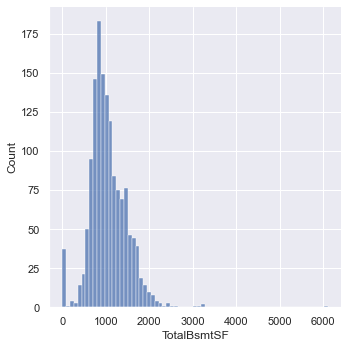

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                1stFlrSF


<Figure size 720x720 with 0 Axes>

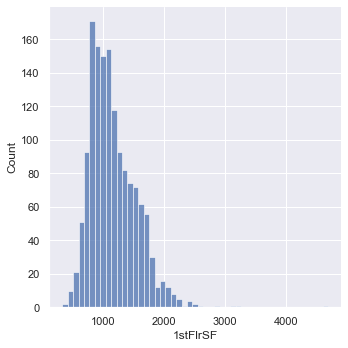

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                2ndFlrSF


<Figure size 720x720 with 0 Axes>

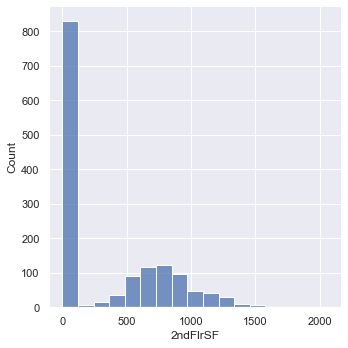

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                LowQualFinSF


<Figure size 720x720 with 0 Axes>

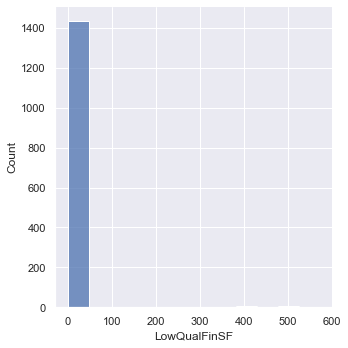

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GrLivArea


<Figure size 720x720 with 0 Axes>

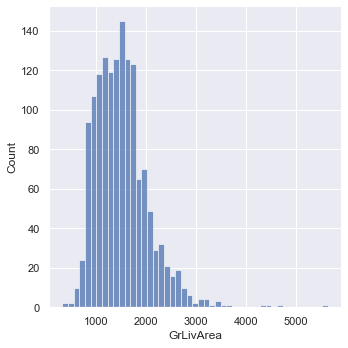

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageArea


<Figure size 720x720 with 0 Axes>

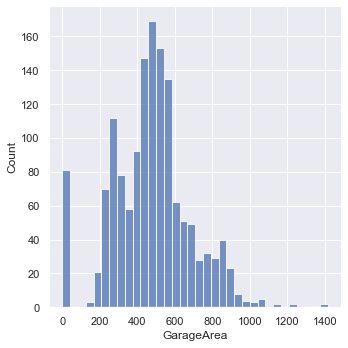

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                WoodDeckSF


<Figure size 720x720 with 0 Axes>

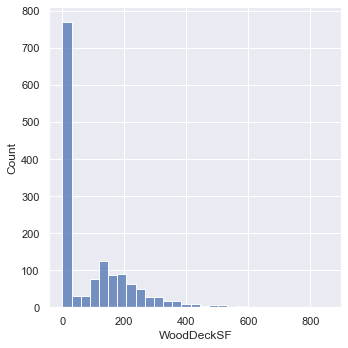

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                OpenPorchSF


<Figure size 720x720 with 0 Axes>

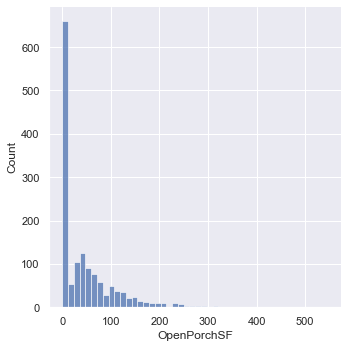

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                EnclosedPorch


<Figure size 720x720 with 0 Axes>

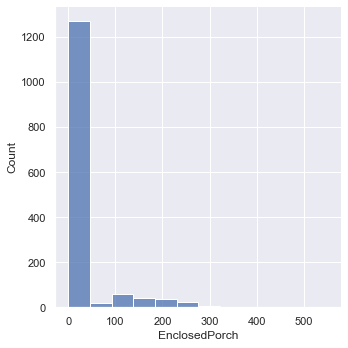

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                3SsnPorch


<Figure size 720x720 with 0 Axes>

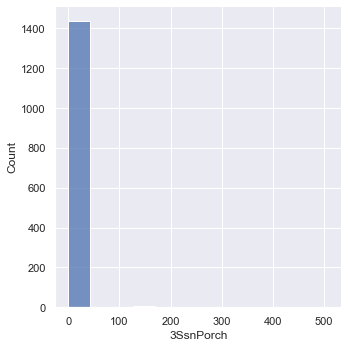

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                ScreenPorch


<Figure size 720x720 with 0 Axes>

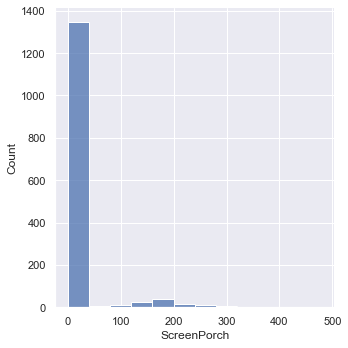

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                PoolArea


<Figure size 720x720 with 0 Axes>

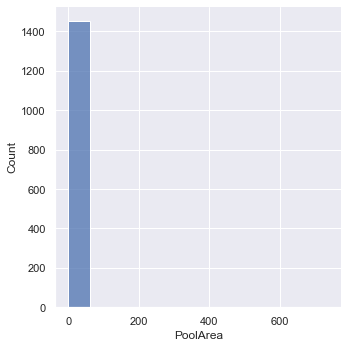

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MiscVal


<Figure size 720x720 with 0 Axes>

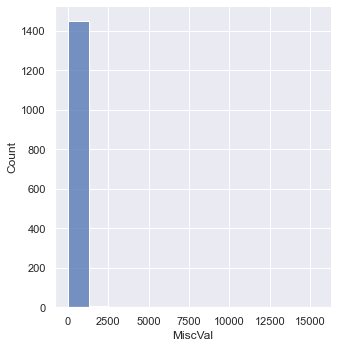

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                YrSold


<Figure size 720x720 with 0 Axes>

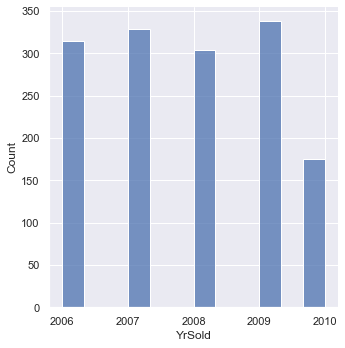

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [11]:
for col in nu_int16:
    print("               ",col)
    plt.figure(figsize=(10,10))
    sns.displot(train[col])
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

                OverallQual


<Figure size 720x720 with 0 Axes>

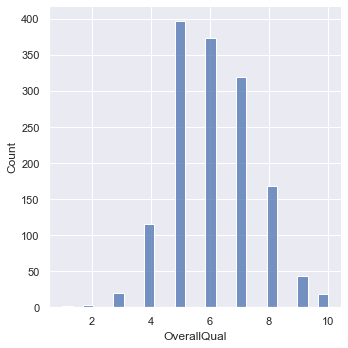

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                OverallCond


<Figure size 720x720 with 0 Axes>

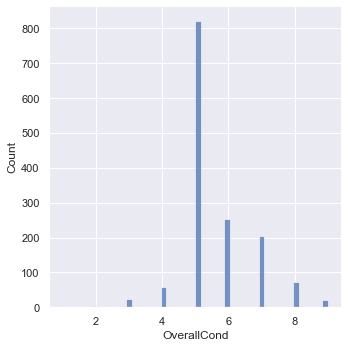

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFullBath


<Figure size 720x720 with 0 Axes>

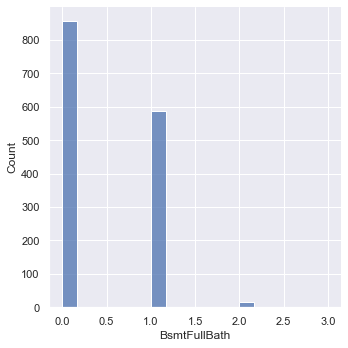

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtHalfBath


<Figure size 720x720 with 0 Axes>

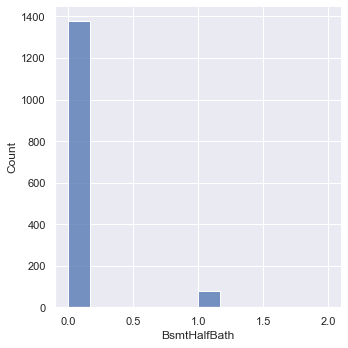

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                FullBath


<Figure size 720x720 with 0 Axes>

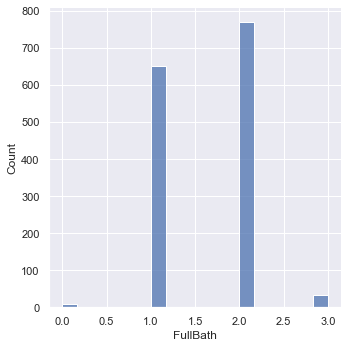

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                HalfBath


<Figure size 720x720 with 0 Axes>

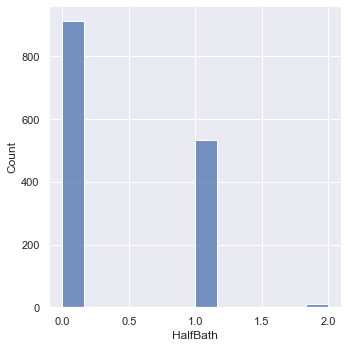

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BedroomAbvGr


<Figure size 720x720 with 0 Axes>

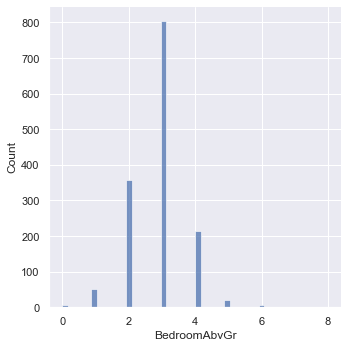

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                KitchenAbvGr


<Figure size 720x720 with 0 Axes>

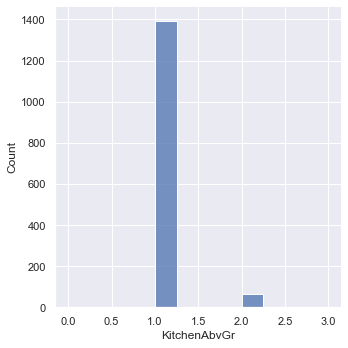

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                TotRmsAbvGrd


<Figure size 720x720 with 0 Axes>

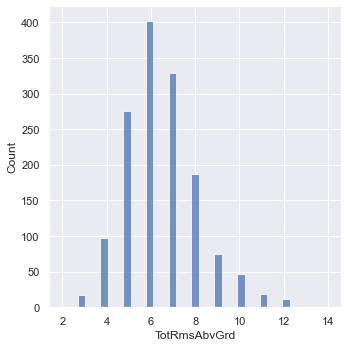

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                Fireplaces


<Figure size 720x720 with 0 Axes>

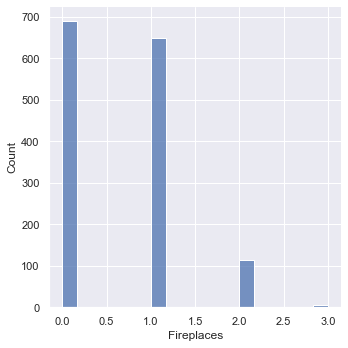

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageCars


<Figure size 720x720 with 0 Axes>

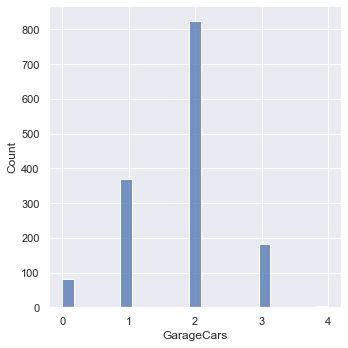

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                MoSold


<Figure size 720x720 with 0 Axes>

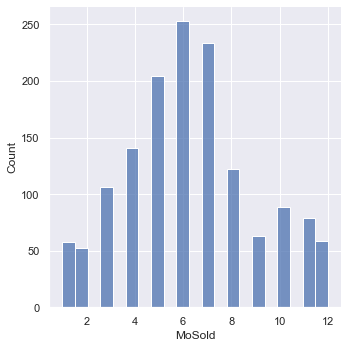

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [12]:
for col in nu_int8:
    print("               ",col)
    plt.figure(figsize=(10,10))
    sns.displot(train[col])
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

In [13]:
train.iloc[:,:35].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,730.500000,56.897260,70.049957,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685265,443.639726
std,421.610009,42.300571,24.284721,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066681,456.098091
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000


In [14]:
train.iloc[:,35:50].describe()

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000
max,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000


In [15]:
train.iloc[:,50:65].describe()

,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000
mean,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506104,1.767123,472.980137
std,0.502885,0.815778,0.220338,1.625393,0.644666,24.689711,0.747315,213.804841
min,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000
max,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000


In [16]:
train.iloc[:,65:].describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Correlation')

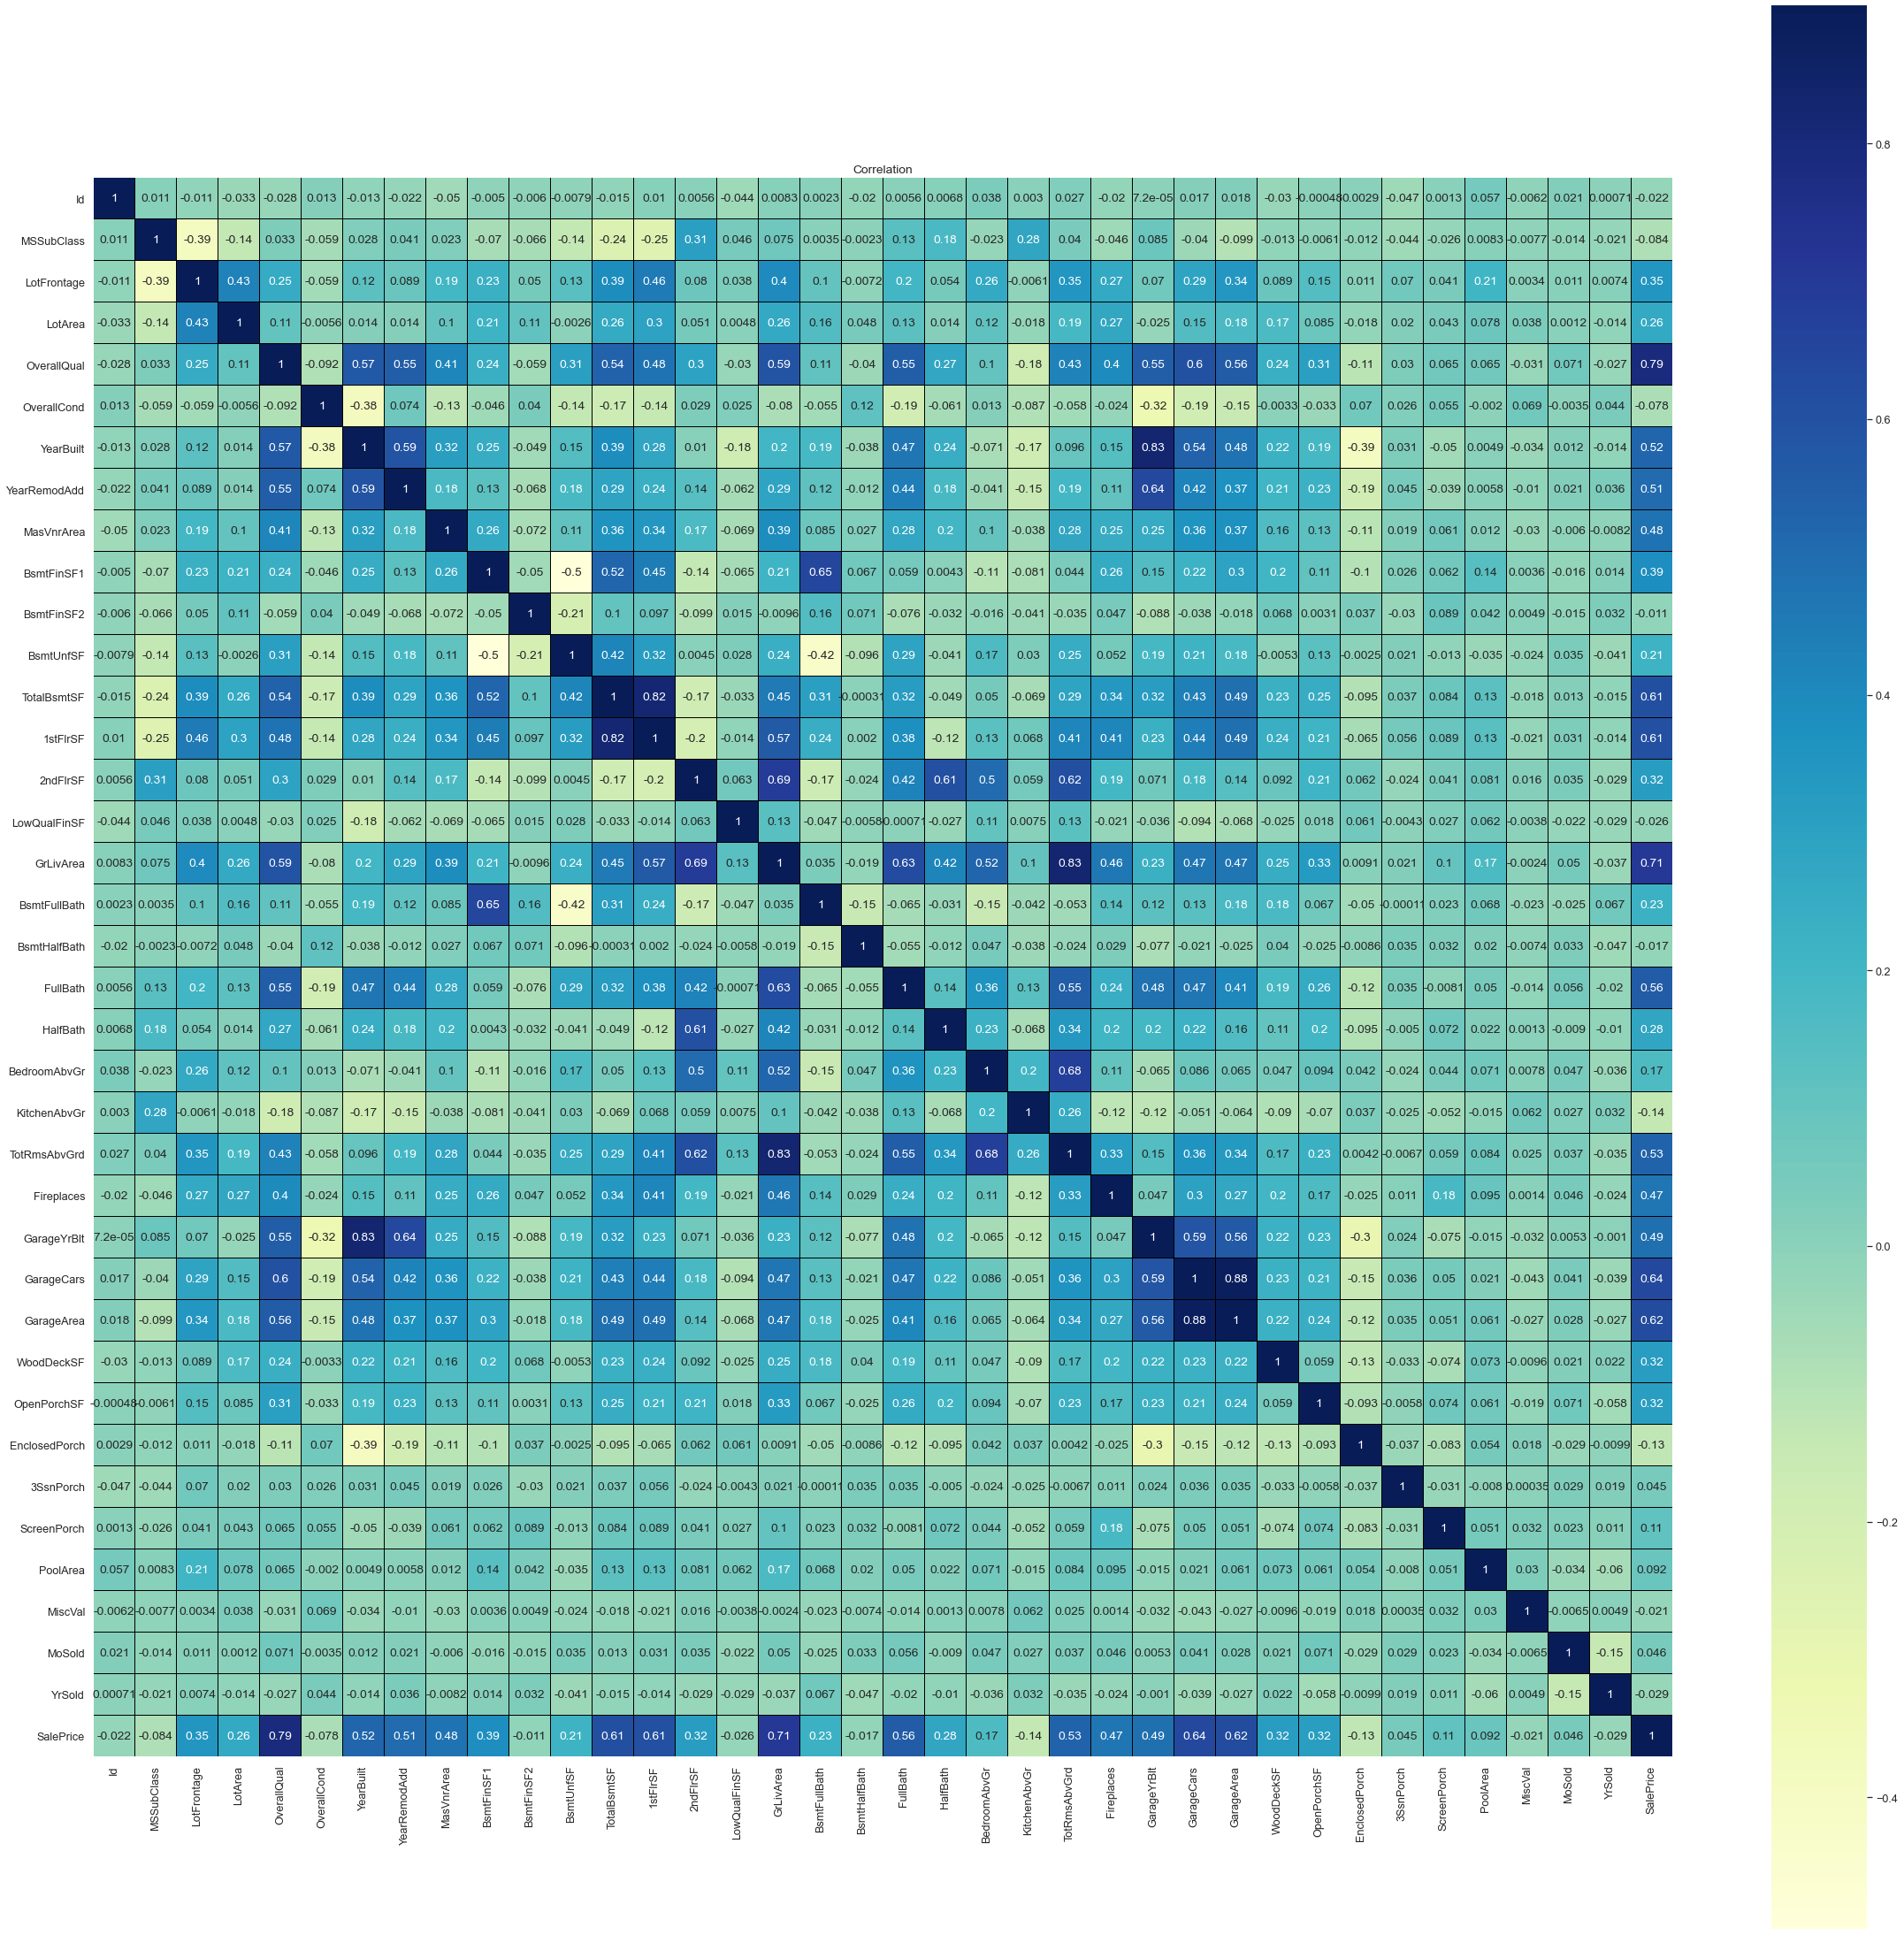

In [17]:
sns.set(font_scale=1.15)
plt.figure(figsize=(40, 40))
sns.heatmap(train.corr(),  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation')

# Drop not important columns and check missing data

In [18]:
cols_with_high_missing_data = list((train.isnull().sum()/train.shape[0])[(train.isnull().sum()/train.shape[0])>=0.3].keys())
cols_with_low_missing_data = list((train.isnull().sum()/train.shape[0])[((train.isnull().sum()/train.shape[0])<0.3)][((train.isnull().sum()/train.shape[0])>0)].keys())

In [19]:
cols_with_high_missing_data

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [20]:
cols_with_low_missing_data

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [21]:
cat_cols_with_high_missing_data = [col for col in cat_cols if col in cols_with_high_missing_data]
cat_cols_with_low_missing_data = [col for col in cat_cols if col in cols_with_low_missing_data]

int8_cols_with_low_missing_data = [col for col in nu_int8 if col in cols_with_low_missing_data]
int8_cols_with_high_missing_data = [col for col in nu_int8 if col in cols_with_high_missing_data]

int16_cols_with_low_missing_data = [col for col in nu_int16 if col in cols_with_low_missing_data]
int16_cols_with_high_missing_data = [col for col in nu_int16 if col in cols_with_high_missing_data]

int32_cols_with_low_missing_data = [col for col in nu_int32 if col in cols_with_low_missing_data]
int32_cols_with_high_missing_data = [col for col in nu_int32 if col in cols_with_high_missing_data]

float32_cols_with_low_missing_data = [col for col in nu_float32 if col in cols_with_low_missing_data]
float32_cols_with_high_missing_data = [col for col in nu_float32 if col in cols_with_high_missing_data]

print(len(cat_cols_with_high_missing_data))
print(len(int8_cols_with_high_missing_data))
print(len(int16_cols_with_high_missing_data))
print(len(int32_cols_with_high_missing_data))
print(len(float32_cols_with_high_missing_data))
print("-----------------------------------------------")
print(len(cat_cols_with_low_missing_data))
print(len(int8_cols_with_low_missing_data))
print(len(int16_cols_with_low_missing_data))
print(len(int32_cols_with_low_missing_data))
print(len(float32_cols_with_low_missing_data))

5
0
0
0
0
-----------------------------------------------
11
0
0
0
3


In [22]:
train[cat_cols_with_high_missing_data].head()

,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN,NaN
1,NaN,TA,NaN,NaN,NaN
2,NaN,TA,NaN,NaN,NaN
3,NaN,Gd,NaN,NaN,NaN
4,NaN,TA,NaN,NaN,NaN


In [23]:
train[cat_cols_with_low_missing_data].head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [24]:
train[float32_cols_with_low_missing_data].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [25]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)

# prints number of null values detected by .isnull() and string none
for c in train.columns:
    string_null = np.array([x in a[2:] for x in train[c]])
    print(c, train[c].isnull().sum(), string_null.sum())

Id 0 0
MSSubClass 0 0
MSZoning 0 0
LotFrontage 259 0
LotArea 0 0
Street 0 0
Alley 1369 0
LotShape 0 0
LandContour 0 0
Utilities 0 0
LotConfig 0 0
LandSlope 0 0
Neighborhood 0 0
Condition1 0 0
Condition2 0 0
BldgType 0 0
HouseStyle 0 0
OverallQual 0 0
OverallCond 0 0
YearBuilt 0 0
YearRemodAdd 0 0
RoofStyle 0 0
RoofMatl 0 0
Exterior1st 0 0
Exterior2nd 0 0
MasVnrType 8 864
MasVnrArea 8 0
ExterQual 0 0
ExterCond 0 0
Foundation 0 0
BsmtQual 37 0
BsmtCond 37 0
BsmtExposure 38 0
BsmtFinType1 37 0
BsmtFinSF1 0 0
BsmtFinType2 38 0
BsmtFinSF2 0 0
BsmtUnfSF 0 0
TotalBsmtSF 0 0
Heating 0 0
HeatingQC 0 0
CentralAir 0 0
Electrical 1 0
1stFlrSF 0 0
2ndFlrSF 0 0
LowQualFinSF 0 0
GrLivArea 0 0
BsmtFullBath 0 0
BsmtHalfBath 0 0
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 0 0
KitchenAbvGr 0 0
KitchenQual 0 0
TotRmsAbvGrd 0 0
Functional 0 0
Fireplaces 0 0
FireplaceQu 690 0
GarageType 81 0
GarageYrBlt 81 0
GarageFinish 81 0
GarageCars 0 0
GarageArea 0 0
GarageQual 81 0
GarageCond 81 0
PavedDrive 0 0
WoodDeckSF

In [26]:
for col in train.columns:
    string_null_1= np.array([x for x in train[col] if x in a[4:9]])
    if len(string_null_1)>=1:
        print(col)

MasVnrType


#### we have 5 categorical columns with high missing data
#### we have 11 categorical columns with low missing data 
#### we have 3 numerical (continous) columns with low missing data 

#### MasVnrType : this column is classified as low missing data but it has 8 values missing and 864 values string missing and (8+864)/1460 > 0.3 as a result it must have been classifed as  high missing data. (why this is important for me because maybe we will need to drop all the columns that is classified as high missing data)

In [27]:
cat_cols_with_low_missing_data = cat_cols_with_low_missing_data[1:]
cat_cols_with_high_missing_data.append('MasVnrType')

# Impute missing values

## for every missing value we want to answer the following question:
### Is this value missing because it wasn't recorded or because it doesn't exist? 
##### If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN.
### Obviously you can conclude that the missing data is missing because it wasn't recorded (go bach and look at the description and the EDA then understand what's goning on in order to answer this question)

In [28]:
cat_imp = SimpleImputer(strategy = "most_frequent")
nu_imp = SimpleImputer(strategy = "median") # the distribution of the columns that we want to impute is skewed 

In [29]:
float32_cols_with_low_missing_data

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [30]:
cat_cols_with_low_missing_data

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [31]:
cat_imp.fit(train[cat_cols_with_low_missing_data])
nu_imp.fit(train[float32_cols_with_low_missing_data])

SimpleImputer(strategy='median')

In [32]:
train[cat_cols_with_low_missing_data] = cat_imp.transform(train[cat_cols_with_low_missing_data])
train[float32_cols_with_low_missing_data] = nu_imp.transform(train[float32_cols_with_low_missing_data])
test[cat_cols_with_low_missing_data] = cat_imp.transform(test[cat_cols_with_low_missing_data])
test[float32_cols_with_low_missing_data] = nu_imp.transform(test[float32_cols_with_low_missing_data])

In [33]:
(train.isnull().sum()/train.shape[0] > 0).sum()

6

In [34]:
cat_cols_with_high_missing_data

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']

In [35]:
train = train.drop(cat_cols_with_high_missing_data, axis = 1)
test = test.drop(cat_cols_with_high_missing_data, axis = 1)
train = train.drop("Id", axis = 1)
test_ids = test['Id']
test = test.drop("Id", axis = 1)
(train.isnull().sum()/train.shape[0] > 0).sum()

0

In [36]:
cat_cols_with_high_missing_data

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']

In [37]:
train.shape

(1460, 74)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int16  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int32  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int8   
 16  OverallCond    1460 non-null   int8   
 17  YearBuilt      1460 non-null   int16  
 18  YearRemo

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int16  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int32  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int8   
 16  OverallCond    1459 non-null   int8   
 17  YearBuilt      1459 non-null   int16  
 18  YearRemo

#### now we dealed all the missing data in the training data but it seems that there are some columns in the test data that have a few missing data in columns that doesn't have any missing data. 

In [40]:
test_cols_with_missing_data = [col for col in test.columns if (test[col].isnull().sum()/test.shape[0] > 0)]
print(len(test_cols_with_missing_data))
test_cols_with_missing_data

15


['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [41]:
cat_test_cols_with_missing_data = [col for col in test_cols_with_missing_data if train[col].dtype == "O"]
train[cat_test_cols_with_missing_data].mode()

,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType
0,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD


In [42]:
nu_test_cols_with_missing_data = [col for col in test_cols_with_missing_data if col not in cat_test_cols_with_missing_data]
train[nu_test_cols_with_missing_data].mean()

BsmtFinSF1       443.639726
BsmtFinSF2        46.549315
BsmtUnfSF        567.240411
TotalBsmtSF     1057.429452
BsmtFullBath       0.425342
BsmtHalfBath       0.057534
GarageCars         1.767123
GarageArea       472.980137
dtype: float64

In [43]:
train[nu_test_cols_with_missing_data]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
0,706,0,150,856,1,0,2,548
1,978,0,284,1262,0,1,2,460
2,486,0,434,920,1,0,2,608
3,216,0,540,756,1,0,3,642
4,655,0,490,1145,1,0,3,836
...,...,...,...,...,...,...,...,...
1455,0,0,953,953,0,0,2,460
1456,790,163,589,1542,1,0,2,500
1457,275,0,877,1152,0,0,1,252
1458,49,1029,0,1078,1,0,1,240


In [44]:
train[nu_test_cols_with_missing_data].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,0.425342,0.057534,1.767123,472.980137
std,456.098091,161.319273,441.866955,438.705324,0.518911,0.238753,0.747315,213.804841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1.000000,334.500000
50%,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,2.000000,480.000000
75%,712.250000,0.000000,808.000000,1298.250000,1.000000,0.000000,2.000000,576.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,3.000000,2.000000,4.000000,1418.000000


In [45]:
train[nu_test_cols_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtFinSF1    1460 non-null   int16
 1   BsmtFinSF2    1460 non-null   int16
 2   BsmtUnfSF     1460 non-null   int16
 3   TotalBsmtSF   1460 non-null   int16
 4   BsmtFullBath  1460 non-null   int8 
 5   BsmtHalfBath  1460 non-null   int8 
 6   GarageCars    1460 non-null   int8 
 7   GarageArea    1460 non-null   int16
dtypes: int16(5), int8(3)
memory usage: 18.7 KB


In [46]:
disc_test_cols_with_missing_data = [col for col in nu_test_cols_with_missing_data if train[col].dtype == "int8"]
cont_test_cols_with_missing_data = [col for col in nu_test_cols_with_missing_data if train[col].dtype == "int16"]

In [47]:
len(cat_test_cols_with_missing_data) + len(disc_test_cols_with_missing_data) + len(cont_test_cols_with_missing_data)

15

In [48]:
cat_disc_test_cols_with_missing_data = cat_test_cols_with_missing_data + disc_test_cols_with_missing_data
cat_disc_test_cols_with_missing_data

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars']

In [49]:
train[cat_disc_test_cols_with_missing_data].mode()

,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType,BsmtFullBath,BsmtHalfBath,GarageCars
0,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD,0,0,2


In [50]:
train[cont_test_cols_with_missing_data].median()

BsmtFinSF1     383.5
BsmtFinSF2       0.0
BsmtUnfSF      477.5
TotalBsmtSF    991.5
GarageArea     480.0
dtype: float64

                BsmtFinSF1


<Figure size 720x720 with 0 Axes>

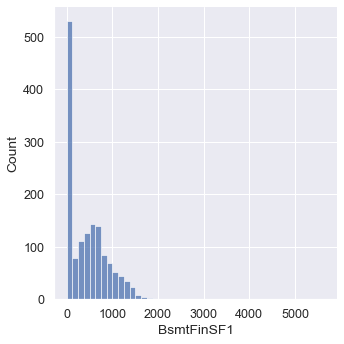

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtFinSF2


<Figure size 720x720 with 0 Axes>

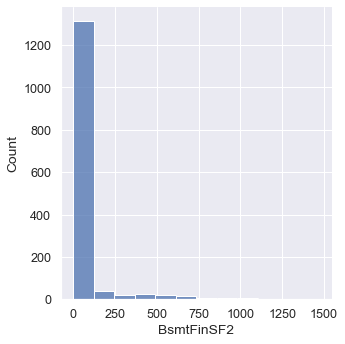

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                BsmtUnfSF


<Figure size 720x720 with 0 Axes>

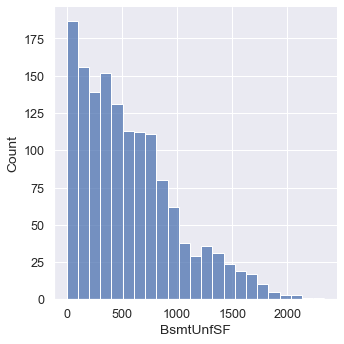

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                TotalBsmtSF


<Figure size 720x720 with 0 Axes>

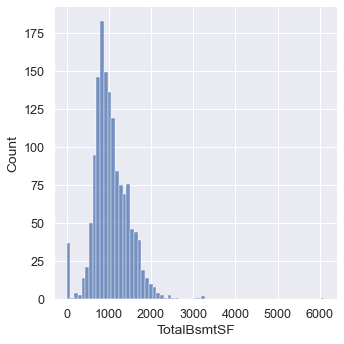

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           
                GarageArea


<Figure size 720x720 with 0 Axes>

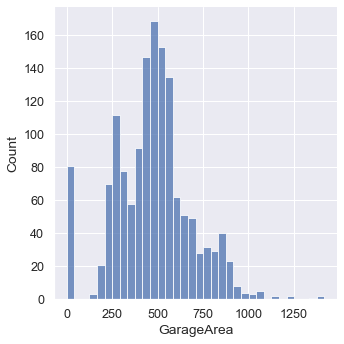

                                                                                                           
-----------------------------------------------------------------------------------------------------------
                                                                                                           


In [51]:
for col in cont_test_cols_with_missing_data:
    print("               ",col)
    plt.figure(figsize=(10,10))
    sns.displot(train[col])
    plt.show()
    print("                                                                                                           ")
    print("-----------------------------------------------------------------------------------------------------------")
    print("                                                                                                           ")

In [52]:
cat_disc_test_imp = SimpleImputer(strategy = "most_frequent")
cont_test_imp = SimpleImputer(strategy = "median")

cat_disc_test_imp.fit(train[cat_disc_test_cols_with_missing_data])
cont_test_imp.fit(train[cont_test_cols_with_missing_data])

test[cat_disc_test_cols_with_missing_data] = cat_disc_test_imp.transform(test[cat_disc_test_cols_with_missing_data])
test[cont_test_cols_with_missing_data] = cont_test_imp.transform(test[cont_test_cols_with_missing_data])

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int16  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int32  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int8   
 16  OverallCond    1459 non-null   int8   
 17  YearBuilt      1459 non-null   int16  
 18  YearRemo

# Encoding & Normalizing our features

In [54]:
train['MSZoning'] = train['MSZoning'].replace("C (all)","C_all")
test['MSZoning'] = test['MSZoning'].replace("C (all)","C_all")

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int16  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int32  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int8   
 16  OverallCond    1460 non-null   int8   
 17  YearBuilt      1460 non-null   int16  
 18  YearRemo

In [56]:
train.columns = train.columns.str.replace("1","_1").str.replace("2","_2").str.replace("3","_3")
test.columns = test.columns.str.replace("1","_1").str.replace("2","_2").str.replace("3","_3")
original_data = train.copy()
original_test = test.copy()
sc = StandardScaler()
label = LabelEncoder()

In [57]:
cat_to_encode = [col for col in train.columns if train[col].dtype == "O"]
len(cat_to_encode)

37

In [58]:
for col in cat_to_encode:
    train[col] = label.fit_transform(train[col])
    test[col] = label.fit_transform(test[col])
len([col for col in train.columns if train[col].dtype == "O"])

0

In [59]:
trainX = train.drop('SalePrice', axis = 1)
trainy = train['SalePrice']
print(trainX.shape)
print(trainy.shape)
print(test.shape)

(1460, 73)
(1460,)
(1459, 73)


In [60]:
sc.fit(trainX)
trainX = sc.transform(trainX)
test = sc.transform(test)

# Training some Models

In [61]:
formula = 'SalePrice ~ ' + ' + '.join(list(train.drop(['SalePrice'], axis=1).columns))
lm = smf.ols(formula = formula, data = train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     109.5
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:26:43   Log-Likelihood:                -17167.
No. Observations:                1460   AIC:                         3.448e+04
Df Residuals:                    1388   BIC:                         3.486e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.623e+06   1.32e+06      1.230      0.219   -9.64e+05    4.21e+06
MSSubClass     -125.7171     45.364     -2.771      0.006    -214.706     -36.729
MSZoning      -1308.0204   1515.047     -0.863      0.388   -4280.049    1664.009
LotFrontage    -144.4719     50.015     -2.889      0.004    -242.585     -46.358
LotArea           0.3908      0.106      3.683      0.000       0.183       0.599
Street         2.945e+04   1.39e+04      2.116      0.035    2147.966    5.67e+04
LotShape       -941.9089    659.863     -1.427      0.154   -2236.346     352.528
LandContour    3402.6108   1342.685      2.534      0.011     768.699    6036.522
Utilities     -4.863e+04   3.32e+04     -1.465      0.143   -1.14e+05    1.65e+04
LotConfig       -79.2875    546.702     -0.145      0.885   -1151.738     993.163
LandSlope      6009.8144   3821.716      1.573      0.116   -1487.149    1.35e+04
Neighborhood    419.8161    154.192      2.723      0.007     117.342     722.290
Condition_1    -786.6246   1013.781     -0.776      0.438   -2775.333    1202.084
Condition_2   -8483.8549   3354.073     -2.529      0.012   -1.51e+04   -1904.256
BldgType      -2352.9322   1490.460     -1.579      0.115   -5276.729     570.864
HouseStyle    -1312.8377    653.573     -2.009      0.045   -2594.936     -30.739
OverallQual    1.115e+04   1180.879      9.440      0.000    8830.541    1.35e+04
OverallCond    4509.7684   1045.232      4.315      0.000    2459.364    6560.173
YearBuilt       178.6694     77.109      2.317      0.021      27.406     329.933
YearRemodAdd     44.7956     67.682      0.662      0.508     -87.975     177.566
RoofStyle      2149.7582   1121.550      1.917      0.055     -50.358    4349.874
RoofMatl       4873.9069   1501.451      3.246      0.001    1928.548    7819.266
Exterior_1st  -1029.3340    519.835     -1.980      0.048   -2049.081      -9.587
Exterior_2nd    393.6707    470.693      0.836      0.403    -529.676    1317.018
MasVnrArea       24.7802      5.630      4.401      0.000      13.736      35.824
ExterQual     -9523.9266   1961.894     -4.854      0.000   -1.34e+04   -5675.329
ExterCond       655.4738   1254.473      0.523      0.601   -1805.394    3116.342
Foundation     1246.2675   1651.892      0.754      0.451   -1994.208    4486.743
BsmtQual      -9560.5074   1443.691     -6.622      0.000   -1.24e+04   -6728.456
BsmtCond       2461.4555   1376.043      1.789      0.074    -237.893    5160.804
BsmtExposure  -3885.5877    891.691     -4.358      0.000   -5634.795   -2136.380
BsmtFinType_1  -842.2851    631.013     -1.335      0.182   -2080.128     395.558
BsmtFinSF_1       4.5859      2.888      1.588      0.112      -1.079      10.251
BsmtFinType_2   625.7518   1381.907      0.453      0.651   -2085.101    3336.604
BsmtFinSF_2       5.5084      6.033      0.913   

In [62]:
dum_data = pd.get_dummies(original_data, columns=cat_to_encode)
dum_test = pd.get_dummies(original_test, columns=cat_to_encode)

In [63]:
formula = 'SalePrice ~ ' + ' + '.join(list(original_data.drop(['SalePrice'], axis=1).columns))
lm = smf.ols(formula = formula, data = original_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     72.59
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:26:43   Log-Likelihood:                -16602.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1233   BIC:                         3.486e+04
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -8.917e+05   1.05e+06     -0.852      0.395   -2.95e+06    1.16e+06
MSZoning[T.FV]            3.317e+04   1.19e+04      2.794      0.005    9879.374    5.65e+04
MSZoning[T.RH]            2.694e+04   1.19e+04      2.259      0.024    3544.347    5.03e+04
MSZoning[T.RL]            2.829e+04   1.02e+04      2.773      0.006    8276.469    4.83e+04
MSZoning[T.RM]            2.372e+04   9549.283      2.484      0.013    4988.993    4.25e+04
Street[T.Pave]            3.131e+04   1.21e+04      2.589      0.010    7580.561     5.5e+04
LotShape[T.IR2]           3554.9576   4234.152      0.840      0.401   -4751.983    1.19e+04
LotShape[T.IR3]           4091.9256   8888.679      0.460      0.645   -1.33e+04    2.15e+04
LotShape[T.Reg]           1715.5863   1603.665      1.070      0.285   -1430.628    4861.800
LandContour[T.HLS]        8909.7231   5142.247      1.733      0.083   -1178.800     1.9e+04
LandContour[T.Low]       -9635.9787   6385.547     -1.509      0.132   -2.22e+04    2891.761
LandContour[T.Lvl]        6364.9921   3691.849      1.724      0.085    -878.009    1.36e+04
Utilities[T.NoSeWa]      -2.753e+04   2.64e+04     -1.042      0.298   -7.94e+04    2.43e+04
LotConfig[T.CulDSac]      8556.4035   3313.217      2.583      0.010    2056.236    1.51e+04
LotConfig[T.FR2]         -7619.5917   4036.151     -1.888      0.059   -1.55e+04     298.893
LotConfig[T.FR3]         -1.455e+04   1.26e+04     -1.153      0.249   -3.93e+04    1.02e+04
LotConfig[T.Inside]      -1102.2233   1791.319     -0.615      0.538   -4616.594    2412.148
LandSlope[T.Mod]          6799.8792   3981.073      1.708      0.088   -1010.546    1.46e+04
LandSlope[T.Sev]         -4.344e+04   1.14e+04     -3.802      0.000   -6.59e+04    -2.1e+04
Neighborhood[T.Blueste]   3773.9916    1.9e+04      0.199      0.842   -3.34e+04     4.1e+04
Neighborhood[T.BrDale]    2862.4789    1.1e+04      0.261      0.794   -1.86e+04    2.44e+04
Neighborhood[T.BrkSide]  -1169.7896   9345.554     -0.125      0.900   -1.95e+04    1.72e+04
Neighborhood[T.ClearCr]  -1.167e+04   9127.239     -1.278      0.201   -2.96e+04    6239.437
Neighborhood[T.CollgCr]  -7725.0080   7185.640     -1.075      0.283   -2.18e+04    6372.426
Neighborhood[T.Crawfor]   1.455e+04   8480.094      1.716      0.086   -2082.884    3.12e+04
Neighborhood[T.Edwards]  -1.689e+04   7885.953     -2.142      0.032   -3.24e+04   -1416.592
Neighborhood[T.Gilbert]  -9194.0651   7576.576     -1.213      0.225   -2.41e+04    5670.343
Neighborhood[T.IDOTRR]   -6526.4273   1.06e+04     -0.613      0.540   -2.74e+04    1.43e+04
Neighborhood[T.MeadowV]  -2184.1508   1.11e+04     -0.197      0.844    -2.4e+04    1.96e+04
Neighborhood[T.Mitchel]  -1.881e+04   8064.101     -2.332      0.020   -3.46e+04   -2987.647
Neighborhood[T

In [64]:
dum_data.columns = dum_data.columns.str.replace(" ","_").str.replace(".","_").str.replace("&","_")
dum_test.columns = dum_test.columns.str.replace(" ","_").str.replace(".","_").str.replace("&","_")

<ipython-input-64-bf07ff09e3e7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dum_data.columns = dum_data.columns.str.replace(" ","_").str.replace(".","_").str.replace("&","_")
<ipython-input-64-bf07ff09e3e7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dum_test.columns = dum_test.columns.str.replace(" ","_").str.replace(".","_").str.replace("&","_")


In [65]:
formula = 'SalePrice ~ ' + ' + '.join(list(dum_data.drop(['SalePrice'], axis=1).columns))
lm = smf.ols(formula = formula, data = dum_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     72.59
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:26:44   Log-Likelihood:                -16602.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1233   BIC:                         3.486e+04
Df Model:                         226                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.871e+04   1.17e+05     -0.331      0.741   -2.68e+05    1.91e+05
MSSubClass              -28.4876     82.657     -0.345      0.730    -190.651     133.676
LotFrontage              54.4919     43.428      1.255      0.210     -30.708     139.692
LotArea                   0.7431      0.109      6.826      0.000       0.529       0.957
OverallQual            6424.7640   1007.284      6.378      0.000    4448.583    8400.945
OverallCond            5678.6775    872.497      6.509      0.000    3966.934    7390.421
YearBuilt               302.5870     76.045      3.979      0.000     153.395     451.779
YearRemodAdd             96.6402     55.333      1.747      0.081     -11.917     205.197
MasVnrArea               14.5357      4.668      3.114      0.002       5.378      23.693
BsmtFinSF_1              16.7360      2.822      5.931      0.000      11.200      22.272
BsmtFinSF_2               5.1211      5.868      0.873      0.383      -6.391      16.633
BsmtUnfSF                -3.4371      2.635     -1.304      0.192      -8.607       1.733
TotalBsmtSF              18.4199      3.502      5.260      0.000      11.550      25.290
_1stFlrSF                17.3246      6.020      2.878      0.004       5.514      29.135
_2ndFlrSF                33.3657      5.366      6.218      0.000      22.838      43.894
LowQualFinSF            -17.1518     13.441     -1.276      0.202     -43.521       9.218
GrLivArea                33.5384      5.420      6.188      0.000      22.905      44.172
BsmtFullBath            522.0308   1974.871      0.264      0.792   -3352.448    4396.509
BsmtHalfBath          -1088.2657   3020.436     -0.360      0.719   -7014.027    4837.496
FullBath               3684.8636   2208.050      1.669      0.095    -647.088    8016.815
HalfBath                788.2869   2087.691      0.378      0.706   -3307.534    4884.107
BedroomAbvGr          -3504.4090   1363.532     -2.570      0.010   -6179.508    -829.310
KitchenAbvGr          -1.231e+04   5672.248     -2.171      0.030   -2.34e+04   -1183.426
TotRmsAbvGrd           1100.4292    941.471      1.169      0.243    -746.632    2947.491
Fireplaces             2543.9627   1338.225      1.901      0.058     -81.487    5169.413
GarageYrBlt              23.2713     56.233      0.414      0.679     -87.052     133.594
GarageCars             2879.8768   2194.785      1.312      0.190   -1426.049    7185.803
GarageArea               14.5015      7.747      1.872      0.061      -0.697      29.700
WoodDeckSF               13.1766      5.840      2.256      0.024       1.720      24.633
OpenPorchSF               5.2540     11.441      0.459      0.646     -17.192      27.700
EnclosedPorch             4.1423     12.401      0.334      0.738     -20.187      28.471
_3SsnPorch             

In [66]:
for col in dum_data.drop('SalePrice', axis = 1).columns:
    if col not in dum_test.columns:
        dum_test[col] = 0

In [67]:
dum_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int32

In [68]:
X_train, X_test, y_train, y_test = train_test_split(dum_data.drop('SalePrice', axis = 1), dum_data['SalePrice'], test_size = 0.20, random_state = 111)

In [69]:
model2 = AdaBoostRegressor()
model2.fit(X_train, y_train)
y_pred_ad = model2.predict(X_test)

cv = KFold(n_splits = 3, shuffle = True, random_state = 111)
score_ad = r2_score(y_test, y_pred_ad)
print("R2 Score:", score_ad)
rmse = cross_val_score(model2, X_train, y_train, cv = cv)
print("Root Mean squared error:" , np.mean(rmse))

R2 Score: 0.8367580510245386
Root Mean squared error: 0.7463109564971634


In [70]:
model3 =  RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred_rf = model3.predict(X_test)

cv = KFold(n_splits = 10, shuffle = True, random_state = 111)
score_rf = r2_score(y_test, y_pred_rf)
print("R2 Score:", score_rf)
rmse = cross_val_score(model3, X_train, y_train, cv = cv)
print("Root Mean squared error:", np.mean(rmse))

R2 Score: 0.879658463197375
Root Mean squared error: 0.8487371943081113


In [71]:
model4 =  GradientBoostingRegressor()
model4.fit(X_train, y_train)
y_pred_gb = model4.predict(X_test)

cv = KFold(n_splits = 10, shuffle = True, random_state = 111)
score_gb = r2_score(y_test, y_pred_gb)
print("R2 Score:", score_gb)
rmse = cross_val_score(model4, X_train, y_train, cv = cv)
print("Root Mean squared error:", np.mean(rmse))

R2 Score: 0.9179405974620336
Root Mean squared error: 0.8712252042598865


In [72]:
model5 =  XGBRegressor()
model5.fit(X_train, y_train)
y_pred_xg = model5.predict(X_test)

cv = KFold(n_splits = 3, shuffle = True, random_state = 111)
score_xg = r2_score(y_test, y_pred_xg)
print("R2 Score:", score_xg)
rmse = cross_val_score(model5, X_train, y_train, cv = cv)
print("Root Mean squared error:", np.mean(rmse))

R2 Score: 0.8429268357860952
Root Mean squared error: 0.8618321247776001


In [128]:
print(r2_score(model4.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice']))
print(np.sqrt(mean_squared_error(model4.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice'])))

0.9522908001725447
16416.870553484467


In [129]:
print(r2_score(model3.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice']))
print(np.sqrt(mean_squared_error(model3.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice'])))

0.9475463373028732
16643.189626114257


In [130]:
print(r2_score(model2.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice']))
print(np.sqrt(mean_squared_error(model2.predict(dum_data.drop('SalePrice', axis = 1)), dum_data['SalePrice'])))

0.8072886827131832
30452.885584651274


In [131]:
print(r2_score(model2.predict(X_test), y_test))
print(np.sqrt(mean_squared_error(model2.predict(X_test), y_test)))

0.7552728571143887
34511.000583941524


In [132]:
print(r2_score(model3.predict(X_test), y_test))
print(np.sqrt(mean_squared_error(model3.predict(X_test), y_test)))

0.822418734069714
29631.213798414676


In [133]:
print(r2_score(model4.predict(X_test), y_test))
print(np.sqrt(mean_squared_error(model4.predict(X_test), y_test)))

0.8959616500744491
24468.415165260893


In [134]:
dum_datac = sm.add_constant(dum_data)
dum_datac.shape

(1460, 268)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(dum_data.drop('SalePrice', axis = 1), dum_data['SalePrice'], test_size = 0.20, random_state = 111)

In [137]:
state_model = sm.OLS(y_train, X_train).fit()
state_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     57.40
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:13:35   Log-Likelihood:                -13257.
No. Observations:                1168   AIC:                         2.696e+04
Df Residuals:                     947   BIC:                         2.807e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -41.4109     91.424     -0.453      0.651    -220.827     138.005
LotFrontage              14.5956     48.617      0.300      0.764     -80.813     110.004
LotArea                   0.8947      0.135      6.620      0.000       0.629       1.160
OverallQual            6317.7087   1151.239      5.488      0.000    4058.435    8576.982
OverallCond            6072.2774    976.787      6.217      0.000    4155.360    7989.195
YearBuilt               286.4986     90.010      3.183      0.002     109.857     463.140
YearRemodAdd             86.9334     63.529      1.368      0.172     -37.740     211.606
MasVnrArea                9.2911      5.259      1.767      0.078      -1.029      19.611
BsmtFinSF_1              15.2177      3.171      4.798      0.000       8.994      21.442
BsmtFinSF_2               3.0128      6.262      0.481      0.631      -9.277      15.303
BsmtUnfSF                -4.1680      2.937     -1.419      0.156      -9.932       1.596
TotalBsmtSF              14.0627      3.849      3.653      0.000       6.509      21.617
_1stFlrSF                21.2755      6.770      3.143      0.002       7.989      34.562
_2ndFlrSF                29.8269      6.000      4.972      0.000      18.053      41.601
LowQualFinSF            -22.9272     14.739     -1.555      0.120     -51.853       5.999
GrLivArea                28.1752      6.033      4.670      0.000      16.335      40.015
BsmtFullBath           1058.4606   2281.777      0.464      0.643   -3419.463    5536.384
BsmtHalfBath          -3920.6846   3423.424     -1.145      0.252   -1.06e+04    2797.690
FullBath               5120.1281   2574.362      1.989      0.047      68.014    1.02e+04
HalfBath               2998.7273   2337.874      1.283      0.200   -1589.285    7586.739
BedroomAbvGr          -1814.9208   1569.929     -1.156      0.248   -4895.863    1266.022
KitchenAbvGr          -1.224e+04   6842.469     -1.789      0.074   -2.57e+04    1189.039
TotRmsAbvGrd            952.9273   1084.878      0.878      0.380   -1176.115    3081.969
Fireplaces             5142.4967   1563.259      3.290      0.001    2074.644    8210.350
GarageYrBlt              43.4014     64.837      0.669      0.503     -83.839     170.641
GarageCars             2534.3838   2451.309      1.034      0.301   -2276.241    7345.009
GarageArea               18.3637      8.693      2.113      0.035       1.304      35.423
WoodDeckSF                9.3386      6.785      1.376      0.169      -3.976      22.653
OpenPorchSF               1.8577     12.775      0.145      0.884     -23.213      26.929
EnclosedPorch            -2.2106     14.342     -0.154      0.878     -30.357      25.936
_3SsnPorch               39.5470     25.410      1.556      0.120     -10.320      89.414
ScreenPorch            

In [139]:
pred_train = state_model.predict(X_train)
print(r2_score(y_train, pred_train))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

0.9302389855492845
20556.717662864514


In [140]:
test_preds = state_model.predict(X_test)
print(r2_score(y_test, test_preds))
print(np.sqrt(mean_squared_error(y_test, test_preds)))

0.8732441048210617
30410.653212967933


In [141]:
test_preds = model4.predict(dum_test)

In [142]:
df  = pd.DataFrame({"Id":test_ids,"SalePrice":test_preds})
df.to_csv("My_Submission.csv", index = False)
df.head()

,Id,SalePrice
0,1461,121780.424739
1,1462,141829.499317
2,1463,156230.501811
3,1464,155261.740183
4,1465,180883.348472
